# Predictive Models- Citibike Data 2017

In this notebook, I have built a few linear models to predict travel time using the citibike and weather datasets.

In [1]:
#import required packages
import pymysql
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import folium

In [2]:
#connect to the daatbase
db= pymysql.connect(host="",user="",password="",db="citibike")

# Jan dataframe

In [3]:
#jan citibike data

#'distance' variable is created via sql query and gender is imported as 'M', 'F' and 'U' instead of 1,2,0
sql1="select *, (3959*acos(cos(radians(start_station_latitude))*cos(radians(end_station_latitude))\
*cos(radians(start_station_longitude)-radians(end_station_longitude))+sin(radians(start_station_latitude))\
*sin(radians(end_station_latitude)))) AS distance,\
Case when gender = 1 then 'M' when gender = 2 then 'F' else 'U' end as gender2 from 2017_jan2;"
jan_data=pd.read_sql(sql1,db) #store data in a dataframe

#jan weather data
sql2="select * from jan_weather;"
jan_weather=pd.read_sql(sql2,db)#store data in a dataframe

Create new variables- Date, Hour of the day, Speed and Age

In [4]:
#extract date and hour ad then merge with the weather data

#extract date from starttime
jan_data['date'] = jan_data['starttime'].dt.date
jan_data['date'] = jan_data['date'].astype('datetime64[ns]')

#extract hour from starttime
jan_data['hour']=jan_data['starttime'].dt.hour

#join weather and citibike data
jan=pd.merge(jan_data,jan_weather,left_on='date',right_on='date')

#create 'speed variable
jan['speed_mph']=jan['distance']/(jan['tripduration']/3600)

#replace missing birthyears with 0
len(jan[jan['birthyear']==''])
jan['birthyear'].replace(to_replace='',value=0,inplace=True)

#convert birthyear to int
jan['birthyear']=jan['birthyear'].astype(int)

#create 'age' variable
jan['Age']=2018-jan['birthyear']

#replace age 2018 as 0- these are unknown ages coz birthyear was missing
jan['Age'].replace(to_replace=2018,value=0,inplace=True)

In [5]:
#analyze tripduration
jan['tripduration'].quantile(0.99)

2493.329999999958

In [6]:
jan['tripduration'].describe()

count    7.168680e+05
mean     7.676856e+02
std      1.127224e+04
min      6.100000e+01
25%      3.310000e+02
50%      5.240000e+02
75%      8.530000e+02
max      5.325688e+06
Name: tripduration, dtype: float64

In [7]:
#check rows with trip duration>99th percentile
jan[['Age','start_station_name','start_station_latitude','start_station_longitude','end_station_name',\
     'end_station_latitude',\
        'end_station_longitude','distance','speed_mph','tripduration']][jan['tripduration']>=2493]

,Age,start_station_name,start_station_latitude,start_station_longitude,end_station_name,end_station_latitude,end_station_longitude,distance,speed_mph,tripduration
22,0,W 52 St & 9 Ave,40.76461837,-73.98789473,W 43 St & 6 Ave,40.75527307,-73.98316936,0.691479,0.390789,6370
23,0,W 52 St & 9 Ave,40.76461837,-73.98789473,W 43 St & 6 Ave,40.75527307,-73.98316936,0.691479,0.391588,6357
24,0,W 52 St & 9 Ave,40.76461837,-73.98789473,W 43 St & 6 Ave,40.75527307,-73.98316936,0.691479,0.393258,6330
58,30,Cooper Square & E 7 St,40.7292365,-73.99086803,Forsyth St & Canal St,40.7158155,-73.99422366,0.943861,1.358074,2502
80,0,Grand Army Plaza & Plaza St West,40.6729679,-73.97087984,Norfolk St & Broome St,40.7172274,-73.98802084,3.187341,0.875376,13108
81,0,Grand Army Plaza & Plaza St West,40.6729679,-73.97087984,Norfolk St & Broome St,40.7172274,-73.98802084,3.187341,3.212326,3572
159,41,Central Park West & W 68 St,40.7734066,-73.97782542,W 88 St & West End Ave,40.79025417,-73.9771834,1.164611,1.427025,2938
325,33,Madison St & Montgomery St,40.713126,-73.984844,E 10 St & Avenue A,40.72740794,-73.98142006,1.003005,1.400628,2578
339,0,Grand Army Plaza & Central Park S,40.7643971,-73.97371465,E 97 St & 3 Ave,40.7859201,-73.94860294,1.984519,2.485828,2874
383,0,E 72 St & York Ave,40.76663814,-73.95348296,W 52 St & 9 Ave,40.76461837,-73.98789473,1.806292,1.214087,5356


In [8]:
#create dataframe with some variables useful for modeling
jan_new=jan[['start_station_name','end_station_name','tripduration','gender2','distance','hour',\
             'Avg_Temp_F','Avg_Visibility_mi','Avg_Wind_mph','Precip_in',\
            'Events','speed_mph','Age']]

#create dataframe with upto 99th percentile values for trip duration. The other values seem incorrect for modeling
#purposes. The values higher than the 99th percentile could indicate that the user took many breaks during his travel
jan_new2=jan_new[jan_new['tripduration']<=2493]

In [ ]:
#convert events to dummy variables
jan_new2_events=pd.get_dummies(jan_new2['Events'])

#drop the extra dummy variable-not needed for modeling as the other 2 variables can define this
jan_new2_events.drop('Snow',axis=1,inplace=True)

#concatenate events dummies with the rest of the data
jan_new2.drop('Events',axis=1,inplace=True)
jan_new2=pd.concat([jan_new2,jan_new2_events],axis=1)

#convert hour to dummies-peak and non peak hours
#6 am to 9am and 3 pm to 6 pm are peak hours the rest are regular hours
#create hour bins
l1=[6,7,8,9,15,16,17,18] # list of peak hours times
jan_new2['Hour_Bins'] = 'Regular' # create variable to store the hour bins
jan_new2.loc[jan_new2['hour'].isin(l1) , 'Hour_Bins'] = 'Peak' # mark peak hours 

#create dummies for hour bins
jan_new2_hour=pd.get_dummies(jan_new2['Hour_Bins'])
jan_new2_hour.drop('Regular',axis=1,inplace=True) #drop the extra dummy variable
jan_new2=pd.concat([jan_new2,jan_new2_hour],axis=1) #concatenate hour bins with the rest of the data

In [10]:
#check the new dataframe
jan_new2.head()

,start_station_name,end_station_name,tripduration,gender2,distance,hour,Avg_Temp_F,Avg_Visibility_mi,Avg_Wind_mph,Precip_in,speed_mph,Age,Clear,Rain,Hour_Bins,Peak
0,W 82 St & Central Park West,Central Park West & W 72 St,680,F,0.543187,0,48.0,9.22,8.0,0.0,2.875694,53,1,0,Regular,0
1,Cooper Square & E 7 St,Broadway & W 32 St,1282,F,1.342357,0,48.0,9.22,8.0,0.0,3.769489,31,1,0,Regular,0
2,5 Ave & E 78 St,3 Ave & E 71 St,648,U,0.576545,0,48.0,9.22,8.0,0.0,3.203029,0,1,0,Regular,0
3,5 Ave & E 78 St,3 Ave & E 71 St,631,U,0.576545,0,48.0,9.22,8.0,0.0,3.289323,0,1,0,Regular,0
4,5 Ave & E 78 St,3 Ave & E 71 St,621,U,0.576545,0,48.0,9.22,8.0,0.0,3.342292,0,1,0,Regular,0


# Feb dataframe

In [11]:
#feb citibike dataframe
#'distance' variable is create via the sql query and convert gender to 'M', 'F', 'U' from 1,2,0
sql2="select *, (3959*acos(cos(radians(start_station_latitude))*cos(radians(end_station_latitude))*\
cos(radians(start_station_longitude)-radians(end_station_longitude))+sin(radians(start_station_latitude))*\
sin(radians(end_station_latitude)))) AS distance, Case when gender = 1 then 'M' when gender = 2 then 'F' else 'U'\
end as gender2 from 2017_feb2;"
feb_data=pd.read_sql(sql2,db)#store data in dataframe

#weather dataframe
sql4="select * from feb_weather;"
feb_weather=pd.read_sql(sql4,db)#store data in dataframe

Create new variables- Data, Hour of the day, Speed and Age

In [12]:
#extract date and hour ad then merge with the weather data
#extract date from starttime
feb_data['date'] = feb_data['starttime'].dt.date
feb_data['date'] = feb_data['date'].astype('datetime64[ns]')

#extract hour from starttime
feb_data['hour']=feb_data['starttime'].dt.hour

#join weather and citibike data
feb=pd.merge(feb_data,feb_weather,left_on='date',right_on='date')

#create variable for speed
feb['speed_mph']=feb['distance']/(feb['tripduration']/3600)

##replace missing birthyears with 0
len(feb[feb['birthyear']==''])
feb['birthyear'].replace(to_replace='',value=0,inplace=True)

#convert birthyear to int
feb['birthyear']=feb['birthyear'].astype(int)

#create 'age' variable
feb['Age']=2018-feb['birthyear']

#replace age 2018 as 0- these are unknown ages because birthyear was missing
feb['Age'].replace(to_replace=2018,value=0,inplace=True)

In [13]:
#analyze trip duration
feb['tripduration'].describe()


count    7.795900e+05
mean     7.984594e+02
std      6.482644e+03
min      6.100000e+01
25%      3.430000e+02
50%      5.520000e+02
75%      9.250000e+02
max      2.836964e+06
Name: tripduration, dtype: float64

In [14]:
feb['tripduration'].quantile(0.99)

2694.0

In [15]:
#check rows with trip duration > 99th percentile
feb[['Age','start_station_name','start_station_latitude','start_station_longitude','end_station_name',\
     'end_station_latitude',\
        'end_station_longitude','distance','speed_mph','tripduration']][feb['tripduration']>=2694]

,Age,start_station_name,start_station_latitude,start_station_longitude,end_station_name,end_station_latitude,end_station_longitude,distance,speed_mph,tripduration
9,31,E 24 St & Park Ave S,40.74096374,-73.98602213,Prospect Park West & 8 St,40.66514682,-73.97637606,5.263078,6.482066,2923
755,54,Central Park West & W 76 St,40.77896784,-73.97374737,E 14 St & Avenue B,40.72938685,-73.97772429,3.432245,4.114579,3003
1032,0,Broadway & W 32 St,40.74854862,-73.98808416,W 20 St & 8 Ave,40.74345335,-74.00004031,0.718120,0.299772,8624
1046,0,Broadway & W 32 St,40.74854862,-73.98808416,W 20 St & 8 Ave,40.74345335,-74.00004031,0.718120,0.300469,8604
1464,34,Stanton St & Mangin St,40.71782143,-73.97628939,Broadway & W 49 St,40.76068327,-73.98452729,2.992888,2.334142,4616
1787,51,E 84 St & 1 Ave,40.77565541,-73.95068615,South St & Gouverneur Ln,40.70355377,-74.00670227,5.781123,6.969874,2986
2082,30,Barrow St & Hudson St,40.73172428,-74.00674436,2 Ave & E 31 St,40.74290902,-73.97706058,1.735676,1.271299,4915
2085,42,Riverside Blvd & W 67 St,40.77750703,-73.98888588,South St & Gouverneur Ln,40.70355377,-74.00670227,5.194423,6.897796,2711
2365,0,Carroll St & Bond St,40.6786115,-73.99037292,1 Pl & Clinton St,40.6809591,-73.99905709,0.483108,0.105977,16411
2694,55,East End Ave & E 86 St,40.77518615,-73.94446054,Centre St & Worth St,40.71494807,-74.00234482,5.148503,6.088900,3044


In [16]:
#create dataframe with some variables needed for modeling
feb_new=feb[['start_station_name','end_station_name','tripduration','gender2','distance','hour','Avg_Temp_F',\
             'Avg_Visibility_mi','Avg_Wind_mph','Precip_in',\
           'Events','speed_mph','Age']]

#create dataframe with upto 99 percentile values for trip duration. VAlues higher than 99th percentile could be becasue the 
#user took breaks during the travel and will not help in the modeling
feb_new2=feb_new[feb_new['tripduration']<=2694]

In [17]:
#convert events to dummy variables
feb_new2['Events'].value_counts()

Clear                  472294
Rain                   189552
Fog                     41421
Rain , Thunderstorm     31767
Snow                    31118
Rain , Snow              5651
Name: Events, dtype: int64

In [ ]:
#clean up events data
feb_new2['Events'].replace(to_replace='Fog',value='Rain',inplace=True)
feb_new2['Events'].replace(to_replace='Rain , Thunderstorm',value='Rain',inplace=True)
feb_new2['Events'].replace(to_replace='Rain , Snow',value='Snow',inplace=True)

#create dummy for 'Events'
feb_new2_events=pd.get_dummies(feb_new2['Events'])
#remove the extra dummy
feb_new2_events.drop('Snow',axis=1,inplace=True)
feb_new2.drop('Events',axis=1,inplace=True)

feb_new2=pd.concat([feb_new2,feb_new2_events],axis=1) # concatenate events dummies with the rest of the data

#convert hour to dummies-peak and non peak hours
#6 am to 9am and 3 pm to 6 pm are peak hours the rest are regular hours
#create hour bins
l1=[6,7,8,9,15,16,17,18] #list of peak hour time
feb_new2['Hour_Bins'] = 'Regular' #create variable to store the hour bins
feb_new2.loc[feb_new2['hour'].isin(l1) , 'Hour_Bins'] = 'Peak' #mark peak hours

#creat hour bins dummy
feb_new2_hour=pd.get_dummies(feb_new2['Hour_Bins'])
feb_new2_hour.drop('Regular',axis=1,inplace=True) #drop extra dummy
feb_new2=pd.concat([feb_new2,feb_new2_hour],axis=1)# concatenate hours dummies with the rest of the data

In [19]:
#check df
feb_new2.head()

,start_station_name,end_station_name,tripduration,gender2,distance,hour,Avg_Temp_F,Avg_Visibility_mi,Avg_Wind_mph,Precip_in,speed_mph,Age,Clear,Rain,Hour_Bins,Peak
0,W 13 St & 6 Ave,E 58 St & 3 Ave,1087,M,2.300132,0,40.0,10.0,9.0,10.0,7.617733,52,0,1,Regular,0
1,Central Park W & W 96 St,Central Park S & 6 Ave,704,U,1.852832,0,40.0,10.0,9.0,10.0,9.474708,0,0,1,Regular,0
2,Sullivan St & Washington Sq,E 4 St & 2 Ave,212,M,0.565889,0,40.0,10.0,9.0,10.0,9.609438,34,0,1,Regular,0
3,W 44 St & 5 Ave,Central Park W & W 96 St,1140,M,2.630863,0,40.0,10.0,9.0,10.0,8.307987,38,0,1,Regular,0
4,8 Ave & W 33 St,E 35 St & 3 Ave,320,M,0.909089,0,40.0,10.0,9.0,10.0,10.227247,31,0,1,Regular,0


# Mar dataframe

In [20]:
#march  citibike dataframe
#'distance' variable is create via the sql query
sql5="select *, (3959*acos(cos(radians(start_station_latitude))*cos(radians(end_station_latitude))\
*cos(radians(start_station_longitude)-radians(end_station_longitude))+sin(radians(start_station_latitude))\
*sin(radians(end_station_latitude)))) AS distance, Case when gender = 1 then 'M' when gender = 2 then 'F' else 'U'\
end as gender2 from 2017_mar2;"
mar_data=pd.read_sql(sql5,db) #store data in dataframe

#march weather data
sql5="select * from mar_weather;"
mar_weather=pd.read_sql(sql5,db)#store data in dataframe

Create new variables- Date, Hour of the day,Speed and Age

In [21]:
#extract date and hour ad then merge with the weather data
#extarct date from starttime
mar_data['date'] = mar_data['starttime'].dt.date
mar_data['date'] = mar_data['date'].astype('datetime64[ns]')
#extract hour from starttime
mar_data['hour']=mar_data['starttime'].dt.hour
#join weather and citibike data
mar=pd.merge(mar_data,mar_weather,left_on='date',right_on='date')

#create 'speed' variable
mar['speed_mph']=mar['distance']/(mar['tripduration']/3600)

#replace missing birthyears with 0
len(mar[mar['birthyear']==''])
mar['birthyear'].replace(to_replace='',value=0,inplace=True)

#convert birthyear to int
mar['birthyear']=mar['birthyear'].astype(int)

#create 'age' variable
mar['Age']=2018-mar['birthyear']

#replace age 2018 as 0- these are unknown ages coz birthyear was missing
mar['Age'].replace(to_replace=2018,value=0,inplace=True)

In [22]:
#analyze tripe duration
mar['tripduration'].describe()

count    7.173730e+05
mean     7.761338e+02
std      6.216808e+03
min      6.100000e+01
25%      3.360000e+02
50%      5.370000e+02
75%      8.830000e+02
max      2.480190e+06
Name: tripduration, dtype: float64

In [23]:
mar['tripduration'].quantile(0.99)

2552.0

In [24]:
#check rows with trip duration > 99th percentile
mar[['Age','start_station_name','start_station_latitude','start_station_longitude','end_station_name',\
     'end_station_latitude',\
        'end_station_longitude','distance','speed_mph','tripduration']][mar['tripduration']>=2552]

,Age,start_station_name,start_station_latitude,start_station_longitude,end_station_name,end_station_latitude,end_station_longitude,distance,speed_mph,tripduration
83,0,Vesey Pl & River Terrace,40.7153379,-74.01658354,Greenwich St & Hubert St,40.721319,-74.010065,0.536042,0.080810,23880
108,26,1 Ave & E 18 St,40.73381219,-73.98054421,E 13 St & Avenue A,40.72955361,-73.98057249,0.294261,0.360934,2935
126,38,Park Ave & St Edwards St,40.69608941,-73.97803415,Lexington Ave & Classon Ave,40.68676793,-73.95928168,1.174785,0.114996,36777
775,54,Central Park West & W 76 St,40.77896784,-73.97374737,E 14 St & Avenue B,40.72938685,-73.97772429,3.432245,4.717862,2619
1209,0,E 81 St & York Ave,40.7728384,-73.94989233,E 76 St & Park Ave,40.773763,-73.96222088,0.648279,0.458688,5088
1360,35,Leonard St & Church St,40.717571,-74.005549,Duane St & Greenwich St,40.71748752,-74.0104554,0.257020,0.065659,14092
2098,34,Willoughby St & Fleet St,40.69196566,-73.9813018,8 Ave & W 52 St,40.76370739,-73.9851615,4.961299,6.356112,2810
2265,29,E 91 St & 2 Ave,40.7811223,-73.94965589,E 33 St & 2 Ave,40.744023,-73.976056,2.912116,3.510923,2986
2271,39,Columbia St & Kane St,40.68763155,-74.0016256,Lexington Ave & E 63 St,40.76440023,-73.96648977,5.614553,7.360666,2746
2436,58,Broadway & W 58 St,40.76695317,-73.98169333,W 27 St & 7 Ave,40.746647,-73.993915,1.542048,2.104387,2638


In [25]:
#create dataframe with some variables useful for modeling
mar_new=mar[['start_station_name','end_station_name','tripduration','gender2','distance','hour','Avg_Temp_F',\
             'Avg_Visibility_mi','Avg_Wind_mph','Precip_in',\
            'Events','speed_mph','Age']]

#create dataframe with upto 99 percentile values for trip duration. VAlues higher than that could be because the 
#user took breaks during the travel and is not useful for modeling
mar_new2=mar_new[mar_new['tripduration']<=2552]

In [ ]:
#convert events to dummy variables
#clean up Events data
mar_new2['Events'].replace(to_replace='Fog , Rain , Thunderstorm',value='Rain',inplace=True)
mar_new2['Events'].replace(to_replace='Rain , Snow',value='Snow',inplace=True)

#get dummy for 'Events'
mar_new2_events=pd.get_dummies(mar_new2['Events'])
mar_new2_events.drop('Snow',axis=1,inplace=True)#drop extra dummy
mar_new2.drop('Events',axis=1,inplace=True)

mar_new2=pd.concat([mar_new2,mar_new2_events],axis=1) #concatenate 'Events' dummy with the rest of the data

#convert hour to dummies-peak and non peak hours
#6 am to 9am and 3 pm to 6 pm are peak hours the rest are regular hours
#create hour bins
l1=[6,7,8,9,15,16,17,18] #list of peak hours
mar_new2['Hour_Bins'] = 'Regular' #create variable to store hour bins
mar_new2.loc[mar_new2['hour'].isin(l1) , 'Hour_Bins'] = 'Peak'#mark peak hours

#get hour bins dummy variables
mar_new2_hour=pd.get_dummies(mar_new2['Hour_Bins'])
mar_new2_hour.drop('Regular',axis=1,inplace=True)#drop extra dummy
mar_new2=pd.concat([mar_new2,mar_new2_hour],axis=1) #concatenate 'Hours Bins' dummy with the rest of the data

In [27]:
#check dataframe
mar_new2.head()

,start_station_name,end_station_name,tripduration,gender2,distance,hour,Avg_Temp_F,Avg_Visibility_mi,Avg_Wind_mph,Precip_in,speed_mph,Age,Clear,Rain,Hour_Bins,Peak
0,Catherine St & Monroe St,E 33 St & 2 Ave,1893,F,2.516877,0,60.0,10.0,6.0,20.0,4.786453,45,0,1,Regular,0
1,Barrow St & Hudson St,Greenwich Ave & 8 Ave,223,F,0.547861,0,60.0,10.0,6.0,20.0,8.844390,33,0,1,Regular,0
2,E 25 St & 1 Ave,Canal St & Rutgers St,1665,M,1.776790,0,60.0,10.0,6.0,20.0,3.841707,30,0,1,Regular,0
3,Fulton St & William St,Cliff St & Fulton St,100,M,0.112090,0,60.0,10.0,6.0,20.0,4.035240,27,0,1,Regular,0
4,1 Ave & E 30 St,South St & Whitehall St,1229,M,3.387486,0,60.0,10.0,6.0,20.0,9.922660,55,0,1,Regular,0


# Apr dataframe

In [28]:
#april citibike dataframe
#distance variable is created via sql query
sql7="select *, (3959*acos(cos(radians(start_station_latitude))*cos(radians(end_station_latitude))\
*cos(radians(start_station_longitude)-radians(end_station_longitude))+sin(radians(start_station_latitude))\
*sin(radians(end_station_latitude)))) AS distance, Case when gender = 1 then 'M' when gender = 2 then 'F' else 'U'\
end as gender2 from 2017_apr2;"
apr_data=pd.read_sql(sql7,db)#store data in dataframe

#april weather data
sql8="select * from apr_weather;"
apr_weather=pd.read_sql(sql8,db)#store data in dataframe

Create new variables-Date, Hour of the day, Speed and Age

In [29]:
#extract date and hour ad then merge with the weather data
#extract date from starttime
apr_data['date'] = apr_data['starttime'].dt.date
apr_data['date'] = apr_data['date'].astype('datetime64[ns]')
#extract hour from starttime
apr_data['hour']=apr_data['starttime'].dt.hour
#merge weather and citibike data
apr=pd.merge(apr_data,apr_weather,left_on='date',right_on='date')

#create 'speed' variable
apr['speed_mph']=apr['distance']/(apr['tripduration']/3600)

#replace missing birthyears with 0
len(apr[apr['birth_year']=='NULL'])
apr['birth_year'].replace(to_replace='NULL',value=0,inplace=True)

#convert birthyear to int
apr['birth_year']=apr['birth_year'].astype(int)

#create 'age' variable
apr['Age']=2018-apr['birth_year']

#replace age 2018 as 0- these are unknown ages coz birthyear was missing
apr['Age'].replace(to_replace=2018,value=0,inplace=True)

In [30]:
#analyze trip duration
apr['tripduration'].describe()

count    1.024564e+06
mean     1.085748e+03
std      2.934312e+04
min      6.100000e+01
25%      3.810000e+02
50%      6.410000e+02
75%      1.122000e+03
max      9.735948e+06
Name: tripduration, dtype: float64

In [31]:
apr['tripduration'].quantile(0.99)

3589.0

In [32]:
#check rows with trip duration >99th percentile
apr[['Age','start_station_name','start_station_latitude','start_station_longitude','end_station_name',\
     'end_station_latitude',\
        'end_station_longitude','distance','speed_mph','tripduration']][apr['tripduration']>=3589]

,Age,start_station_name,start_station_latitude,start_station_longitude,end_station_name,end_station_latitude,end_station_longitude,distance,speed_mph,tripduration
132,22,Montrose Ave & Bushwick Ave,40.70767788,-73.94016171,NYCBS Depot - PIT,40.71690978,-73.98383796,2.374845,0.179407,47654
194,26,Hope St & Union Ave,40.71167351,-73.95141312,Old Slip & Front St,40.7037992,-74.00838676,3.033427,0.049056,222608
688,58,9 Ave & W 45 St,40.76019252,-73.9912551,8 Ave & W 31 St,40.75058535,-73.99468482,0.687677,0.092000,26909
727,0,Central Park West & W 76 St,40.77896784,-73.97374737,Central Park West & W 72 St,40.77579377,-73.97620574,0.254259,0.132369,6915
733,0,Central Park West & W 76 St,40.77896784,-73.97374737,Central Park West & W 72 St,40.77579377,-73.97620574,0.254259,0.132580,6904
1662,0,Grand Army Plaza & Central Park S,40.7643971,-73.97371465,E 59 St & Madison Ave,40.76350532,-73.97109243,0.150433,0.087973,6156
2158,52,W 20 St & 11 Ave,40.746745,-74.007756,W 21 St & 6 Ave,40.74173969,-73.99415556,0.791545,0.405343,7030
2385,38,Bank St & Washington St,40.7361967,-74.00859207,Bank St & Hudson St,40.73652889,-74.00618026,0.128344,0.032607,14170
2487,59,5 Ave & E 73 St,40.77282817,-73.96685276,E 71 St & 1 Ave,40.76703432,-73.9562273,0.685161,0.501847,4915
2589,0,Cleveland Pl & Spring St,40.72210379,-73.99724901,E 39 St & 3 Ave,40.7489006,-73.97604882,2.158812,1.186885,6548


In [33]:
#create dataframe with some variables useful for modeling
apr_new=apr[['start_station_name','end_station_name','tripduration','gender2','distance','hour','Avg_Temp_F',\
             'Avg_Visibility_mi','Avg_Wind_mph','Precip_in',\
            'Events','speed_mph','Age']]

#create dataframe with upto 99 percentile values for trip duration. VAlues higher than that could be becasue the users 
#took breaks during the travel and are not useful for modeling
apr_new2=apr_new[apr_new['tripduration']<=3589]

In [ ]:
#create dummy variables
apr_new2['Events'].value_counts()
#convert events to dummy variables
#clean up Events data
apr_new2['Events'].replace(to_replace='Rain , Thunderstorm',value='Rain',inplace=True)
apr_new2['Events'].replace(to_replace='Fog',value='Rain',inplace=True)

#get dummy
apr_new2_events=pd.get_dummies(apr_new2['Events'])
apr_new2.drop('Events',axis=1,inplace=True)

apr_new2=pd.concat([apr_new2,apr_new2_events],axis=1)#concatenate 'Events' dummies with the remaining data

#convert hour to dummies-peak and non peak hours
#6 am to 9am and 3 pm to 6 pm are peak hours the rest are regular hours
#create hour bins
l1=[6,7,8,9,15,16,17,18] #list of peak hours 
apr_new2['Hour_Bins'] = 'Regular' #create variable to store hours bins
apr_new2.loc[apr_new2['hour'].isin(l1) , 'Hour_Bins'] = 'Peak' #mark peak hours

#create dummy for hours bins
apr_new2_hour=pd.get_dummies(apr_new2['Hour_Bins'])
apr_new2_hour.drop('Regular',axis=1,inplace=True)#drop extra dummy
apr_new2=pd.concat([apr_new2,apr_new2_hour],axis=1)#concatenate 'Events' dummies with the remaining data

In [35]:
#check dataframe
apr_new2.head()

,start_station_name,end_station_name,tripduration,gender2,distance,hour,Avg_Temp_F,Avg_Visibility_mi,Avg_Wind_mph,Precip_in,speed_mph,Age,Clear,Rain,Hour_Bins,Peak
0,Old Fulton St,York St & Jay St,195,M,0.390901,0,42.0,9.0,13.0,19.99,7.216634,52,1,0,Regular,0
1,8 Ave & W 33 St,W 63 St & Broadway,585,M,1.509146,0,42.0,9.0,13.0,19.99,9.287053,23,1,0,Regular,0
2,1 Ave & E 16 St,Forsyth St & Canal St,665,M,1.310638,0,42.0,9.0,13.0,19.99,7.095185,31,1,0,Regular,0
3,E 10 St & Avenue A,E 6 St & Avenue D,262,M,0.432358,0,42.0,9.0,13.0,19.99,5.940794,57,1,0,Regular,0
4,West Drive & Prospect Park West,Prospect Park West & 8 St,134,F,0.324984,0,42.0,9.0,13.0,19.99,8.730909,51,1,0,Regular,0


# May dataframe

In [36]:
#may citibike dataframe
#distance is created via sql query
sql9="select *, (3959*acos(cos(radians(start_station_latitude))*cos(radians(end_station_latitude))\
*cos(radians(start_station_longitude)-radians(end_station_longitude))+sin(radians(start_station_latitude))\
*sin(radians(end_station_latitude)))) AS distance, Case when gender = 1 then 'M' when gender = 2 then 'F' else 'U'\
end as gender2 from 2017_may2;"
may_data=pd.read_sql(sql9,db)#store data in the dataframe

#may weather data
sql10="select * from may_weather;"
may_weather=pd.read_sql(sql10,db)#store data in the dataframe

Create new variables- Date, Hour of the day, Speed and Age

In [37]:
#extract date and hour ad then merge with the weather data
#extract date from starttime
may_data['date'] = may_data['starttime'].dt.date
may_data['date'] = may_data['date'].astype('datetime64[ns]')

#extract time from start time
may_data['hour']=may_data['starttime'].dt.hour

#join weather and citibike data
may=pd.merge(may_data,may_weather,left_on='date',right_on='date')

#create 'speed' variable
may['speed_mph']=may['distance']/(may['tripduration']/3600)

#replace missing birthyears with 0
len(may[may['birth_year']=='NULL'])
may['birth_year'].replace(to_replace='NULL',value=0,inplace=True)

#convert birthyear to int
may['birth_year']=may['birth_year'].astype(int)

#create age variable
may['Age']=2018-may['birth_year']

#replace age 2018 as 0- these are unknown ages coz birthyear was missing
may['Age'].replace(to_replace=2018,value=0,inplace=True)

In [38]:
#analyze tripduration
may['tripduration'].describe()

count    1.492235e+06
mean     9.656749e+02
std      1.374921e+04
min      6.100000e+01
25%      3.850000e+02
50%      6.440000e+02
75%      1.107000e+03
max      5.807661e+06
Name: tripduration, dtype: float64

In [39]:
may['tripduration'].quantile(0.99)

3339.0

In [40]:
#check rows with trip duration >99th percentile
may[['Age','start_station_name','start_station_latitude','start_station_longitude','end_station_name',\
     'end_station_latitude',\
        'end_station_longitude','distance','speed_mph','tripduration']][may['tripduration']>=3339]

,Age,start_station_name,start_station_latitude,start_station_longitude,end_station_name,end_station_latitude,end_station_longitude,distance,speed_mph,tripduration
30,0,9 Ave & W 22 St,40.7454973,-74.00197139,W 44 St & 5 Ave,40.75500254,-73.98014437,1.317875,0.144654,32798
326,0,10 St & 5 Ave,40.6686273,-73.98700053,14 St & 5 Ave,40.666287,-73.98895053,0.191298,0.041773,16486
2329,28,Clermont Ave & Park Ave,40.69573398,-73.97129668,Emerson Pl & Myrtle Ave,40.69363137,-73.96223558,0.496441,0.107792,16580
2554,0,5 Ave & E 93 St,40.7857851,-73.957481,Central Park North & Adam Clayton Powell Blvd,40.799484,-73.955613,0.951592,0.492061,6962
3243,0,Marcus Garvey Blvd & Macon St,40.682601,-73.938037,Broadway & W 49 St,40.76068327096592,-73.9845272898674,5.919169,4.461685,4776
4051,28,Allen St & Rivington St,40.72019576,-73.98997825,Liberty St & Broadway,40.70905623,-74.01043382,1.319174,0.224721,21133
4289,37,Watts St & Greenwich St,40.72405549,-74.00965965,Vesey Pl & River Terrace,40.7153379,-74.01658354,0.703081,0.443119,5712
4942,30,E 31 St & 3 Ave,40.74394314,-73.97966069,Murray St & West St,40.7149787,-74.013012,2.656165,0.650534,14699
5521,31,Nassau Ave & Newell St,40.724812564400175,-73.94752621650696,Broadway & E 22 St,40.7403432,-73.98955109,2.448141,2.160125,4080
5617,28,Bond St & Bergen St,40.6849668,-73.98620772,W 52 St & 6 Ave,40.76132983124814,-73.97982001304626,5.287093,5.250631,3625


In [41]:
#create dataframe with some variables useful for modeling
may_new=may[['start_station_name','end_station_name','tripduration','gender2','distance','hour','Avg_Temp_F',\
             'Avg_Visibility_mi','Avg_Wind_mph','Precip_in',\
            'Events','speed_mph','Age']]

#create dataframe with upto 99 percentile values for trip duration. Values higher than that could be becasue the user
#took breaks during travel and will not be useful for modeling
may_new2=may_new[may_new['tripduration']<=3339]

In [ ]:
#create dummy

may_new2['Events'].value_counts()
#convert events to dummy variables
#clean up Events data
may_new2['Events'].replace(to_replace='Rain , Thunderstorm',value='Rain',inplace=True)
may_new2['Events'].replace(to_replace='Fog',value='Rain',inplace=True)
#create dummy 'Events'
may_new2_events=pd.get_dummies(may_new2['Events'])
may_new2.drop('Events',axis=1,inplace=True)

may_new2=pd.concat([may_new2,may_new2_events],axis=1) #concatenate 'Events' with the remaining data

#convert hour to dummies-peak and non peak hours
#6 am to 9am and 3 pm to 6 pm are peak hours the rest are regular hours
#create hour bins
l1=[6,7,8,9,15,16,17,18] #list of peak hours
may_new2['Hour_Bins'] = 'Regular' #create variable to store hours bins
may_new2.loc[may_new2['hour'].isin(l1) , 'Hour_Bins'] = 'Peak' #mark peak hours

#create dummy for hours bin
may_new2_hour=pd.get_dummies(may_new2['Hour_Bins'])
may_new2_hour.drop('Regular',axis=1,inplace=True)#drop extra dummy
may_new2=pd.concat([may_new2,may_new2_hour],axis=1)#concatenate 'Hours Bins' with the remaining data

In [43]:
#check dataframe
may_new2.head()

,start_station_name,end_station_name,tripduration,gender2,distance,hour,Avg_Temp_F,Avg_Visibility_mi,Avg_Wind_mph,Precip_in,speed_mph,Age,Clear,Rain,Hour_Bins,Peak
0,E 14 St & Avenue B,E 9 St & Avenue C,254,F,0.288402,0,61.0,8.0,8.0,20.0,4.087584,22,1,0,Regular,0
1,E 14 St & Avenue B,E 9 St & Avenue C,248,M,0.288402,0,61.0,8.0,8.0,20.0,4.186477,22,1,0,Regular,0
2,Carlton Ave & Flushing Ave,Bushwick Ave & Powers St,1120,F,1.992642,0,61.0,8.0,8.0,20.0,6.404921,33,1,0,Regular,0
3,W 18 St & 6 Ave,W 17 St & 8 Ave,212,M,0.389974,0,61.0,8.0,8.0,20.0,6.622193,25,1,0,Regular,0
4,W 26 St & 8 Ave,E 33 St & 2 Ave,686,M,1.132290,0,61.0,8.0,8.0,20.0,5.942047,54,1,0,Regular,0


# Jun dataframe

In [44]:
#june  citibike dataframe
#distance is created via the sql query
sql11="select *, (3959*acos(cos(radians(start_station_latitude))*cos(radians(end_station_latitude))\
*cos(radians(start_station_longitude)-radians(end_station_longitude))+sin(radians(start_station_latitude))\
*sin(radians(end_station_latitude)))) AS distance, Case when gender = 1 then 'M' when gender = 2 then 'F' else 'U'\
end as gender2 from 2017_jun2;"
jun_data=pd.read_sql(sql11,db)#store data in the dataframe

#jun weather data
sql11="select * from jun_weather;"
jun_weather=pd.read_sql(sql11,db)#store data in the dataframe

Create new variables-Date, Hour of the day, Speed and Age

In [45]:
#extract date and hour ad then merge with the weather data
#extract date from starttime
jun_data['date'] = jun_data['starttime'].dt.date
jun_data['date'] = jun_data['date'].astype('datetime64[ns]')

#extract hour form starttime
jun_data['hour']=jun_data['starttime'].dt.hour

#join weather and citibike data
jun=pd.merge(jun_data,jun_weather,left_on='date',right_on='date')

#create 'speed' variable
jun['speed_mph']=jun['distance']/(jun['tripduration']/3600)

#replace missing birthyears with 0
len(jun[jun['birth_year']=='NULL'])
jun['birth_year'].replace(to_replace='NULL',value=0,inplace=True)

#convert birthyear to int
jun['birth_year']=jun['birth_year'].astype(int)

#create age variable
jun['Age']=2018-jun['birth_year']

#replace age 2018 as 0- these are unknown ages coz birthyear was missing
jun['Age'].replace(to_replace=2018,value=0,inplace=True)

In [46]:
#analyze trip duration
jun['tripduration'].describe()

count    1.693461e+06
mean     1.052665e+03
std      1.498742e+04
min      6.100000e+01
25%      3.920000e+02
50%      6.570000e+02
75%      1.132000e+03
max      4.182314e+06
Name: tripduration, dtype: float64

In [47]:
jun['tripduration'].quantile(0.99)

3449.0

In [48]:
#check rows with trip duration>99th percentile
jun[['Age','start_station_name','start_station_latitude','start_station_longitude','end_station_name',\
     'end_station_latitude',\
        'end_station_longitude','distance','speed_mph','tripduration']][jun['tripduration']>=3449]

,Age,start_station_name,start_station_latitude,start_station_longitude,end_station_name,end_station_latitude,end_station_longitude,distance,speed_mph,tripduration
220,0,8 Ave & W 52 St,40.76370739,-73.9851615,Amsterdam Ave & W 79 St,40.7829391,-73.9786517,1.371830,0.187586,26327
339,47,Centre St & Chambers St,40.71273266,-74.0046073,Vesey Pl & River Terrace,40.7153379,-74.01658354,0.652567,0.093629,25091
367,26,Meserole Ave & Manhattan Ave,40.72708584,-73.95299117,Nassau Ave & Newell St,40.724812564400175,-73.94752621650696,0.326447,0.330393,3557
525,0,Bayard St & Baxter St,40.71602118,-73.99974372,1 Ave & E 68 St,40.76500525,-73.95818491,4.023671,3.201152,4525
566,44,3 St & Prospect Park West,40.668132,-73.97363831,Fulton St & Rockwell Pl,40.688226,-73.979382,1.420695,0.241740,21157
612,32,Bialystoker Pl & Delancey St,40.71622644,-73.98261206,W 52 St & 9 Ave,40.76461837,-73.98789473,3.355184,3.032554,3983
1045,30,Central Park West & W 85 St,40.78472675,-73.96961715,E 47 St & 1 Ave,40.75206862,-73.96784384,2.258505,0.725819,11202
1286,0,Grand Army Plaza & Central Park S,40.7643971,-73.97371465,Broadway & W 41 St,40.75513557,-73.98658032,0.928955,0.848361,3942
2299,41,7 St & 3 Ave,40.67260298150126,-73.98983001708984,Dean St & 4 Ave,40.68312489,-73.97895137,0.923886,0.215567,15429
2990,31,Greenwich Ave & 8 Ave,40.7390169121,-74.0026376103,Washington St & Gansevoort St,40.739323,-74.008119,0.287753,0.168660,6142


In [49]:
#create dataframe with some variables useful for modeling
jun_new=jun[['start_station_name','end_station_name','tripduration','gender2','distance','hour','Avg_Temp_F',\
             'Avg_Visibility_mi','Avg_Wind_mph','Precip_in',\
            'Events','speed_mph','Age']]

#create dataframe with upto 99 percentile values for trip duration. VAlues higher than that could be becasue the user too
#breaks while traveling and are not useful for modeling
jun_new2=jun_new[jun_new['tripduration']<=3449]

In [ ]:
#clean up "Events'
jun_new2['Events'].value_counts()

#convert events to dummy variables
#clean up Events data
jun_new2['Events'].replace(to_replace='Rain , Thunderstorm',value='Rain',inplace=True)
jun_new2['Events'].replace(to_replace='Fog',value='Rain',inplace=True)
jun_new2['Events'].replace(to_replace='Thunderstorm',value='Rain',inplace=True)
jun_new2['Events'].replace(to_replace='Fog , Rain',value='Rain',inplace=True)

#create dummy for 'Events'
jun_new2_events=pd.get_dummies(jun_new2['Events'])
jun_new2.drop('Events',axis=1,inplace=True)

jun_new2=pd.concat([jun_new2,jun_new2_events],axis=1)#concatenate 'Events' dummies with the remaining data

#convert hour to dummies-peak and non peak hours
#6 am to 9am and 3 pm to 6 pm are peak hours the rest are regular hours
#create hour bins
l1=[6,7,8,9,15,16,17,18] #list of peak hours
jun_new2['Hour_Bins'] = 'Regular' #create variable to store hours bins
jun_new2.loc[jun_new2['hour'].isin(l1) , 'Hour_Bins'] = 'Peak' #mark peak hours

#create dummies for hours bins
jun_new2_hour=pd.get_dummies(jun_new2['Hour_Bins'])
jun_new2_hour.drop('Regular',axis=1,inplace=True) #drop extra dummy
jun_new2=pd.concat([jun_new2,jun_new2_hour],axis=1)#concatenate 'Events' dummies with the remaining data

In [51]:
#check the dataframe
jun_new2.head()

,start_station_name,end_station_name,tripduration,gender2,distance,hour,Avg_Temp_F,Avg_Visibility_mi,Avg_Wind_mph,Precip_in,speed_mph,Age,Clear,Rain,Hour_Bins,Peak
0,W 43 St & 10 Ave,W 87 St & Amsterdam Ave,1397,M,2.215620,0,70.0,9.0,8.0,30.0,5.709543,51,0,1,Regular,0
1,W 39 St & 9 Ave,E 15 St & 3 Ave,1103,M,1.576486,0,70.0,9.0,8.0,30.0,5.145377,37,0,1,Regular,0
2,E 20 St & 2 Ave,Broadway & W 41 St,1810,M,1.351701,0,70.0,9.0,8.0,30.0,2.688466,36,0,1,Regular,0
3,Catherine St & Monroe St,E 33 St & 2 Ave,1760,F,2.516877,0,70.0,9.0,8.0,30.0,5.148157,45,0,1,Regular,0
4,William St & Pine St,5 Ave & E 29 St,2165,M,2.867469,0,70.0,9.0,8.0,30.0,4.768078,33,0,1,Regular,0


# Jul dataframe

In [52]:
#july citibike dataframe
#distance variable is created using the sql query
sql13="select *, (3959*acos(cos(radians(start_station_latitude))*cos(radians(end_station_latitude))\
*cos(radians(start_station_longitude)-radians(end_station_longitude))+sin(radians(start_station_latitude))\
*sin(radians(end_station_latitude)))) AS distance, Case when gender = 1 then 'M' when gender = 2 then 'F' else 'U'\
end as gender2 from 2017_jul2;"
jul_data=pd.read_sql(sql13,db)#store data in the dataframe

#jul weather data
sql14="select * from jul_weather;"
jul_weather=pd.read_sql(sql14,db)#store data in the datframe

Create new variables-Date, Hour of the day, Speed and Age

In [53]:
#extract date and hour ad then merge with the weather data
#extract data from starttime
jul_data['date'] = jul_data['starttime'].dt.date
jul_data['date'] = jul_data['date'].astype('datetime64[ns]')

#extract hour from starttime
jul_data['hour']=jul_data['starttime'].dt.hour

#join weather and citibike data
jul=pd.merge(jul_data,jul_weather,left_on='date',right_on='date')

#create 'speed' variable
jul['speed_mph']=jul['distance']/(jul['tripduration']/3600)

#replace missing birthyears with 0
len(jul[jul['birth_year']=='NULL'])
jul['birth_year'].replace(to_replace='NULL',value=0,inplace=True)

#convert birthyear to int
jul['birth_year']=jul['birth_year'].astype(int)

#create age variable
jul['Age']=2018-jul['birth_year']

#replace age 2018 as 0- these are unknown ages coz birthyear was missing
jul['Age'].replace(to_replace=2018,value=0,inplace=True)

In [54]:
#analyze trip duration
jul['tripduration'].describe()

count    1.691997e+06
mean     1.036378e+03
std      9.636942e+03
min      6.100000e+01
25%      3.960000e+02
50%      6.710000e+02
75%      1.166000e+03
max      2.477222e+06
Name: tripduration, dtype: float64

In [55]:
jul['tripduration'].quantile(0.99)

3749.0

In [56]:
jul[['Age','start_station_name','start_station_latitude','start_station_longitude','end_station_name',\
     'end_station_latitude',\
        'end_station_longitude','distance','speed_mph','tripduration']][jul['tripduration']>=3749]

,Age,start_station_name,start_station_latitude,start_station_longitude,end_station_name,end_station_latitude,end_station_longitude,distance,speed_mph,tripduration
108,30,Broadway & Whipple St,40.7016657,-73.9437303,Graham Ave & Herbert St,40.71929301,-73.94500379,1.219830,0.119445,36765
139,31,Broadway & Whipple St,40.7016657,-73.9437303,Richardson St & N Henry St,40.71907891179564,-73.94223690032959,1.205751,0.025141,172653
172,31,Broadway & Whipple St,40.7016657,-73.9437303,Graham Ave & Conselyea St,40.715143,-73.944507,0.932137,0.004662,719810
732,37,Allen St & Hester St,40.71605866,-73.99190759,Pike St & Monroe St,40.71173107,-73.99193043,0.299028,0.098491,10930
747,44,E 2 St & Avenue C,40.7208736,-73.98085795,Pitt St & Stanton St,40.71926081,-73.98178024,0.121457,0.009101,48041
820,30,Plaza St West & Flatbush Ave,40.6750207,-73.97111473,Prospect Park West & 8 St,40.66514681533792,-73.97637605667114,0.735876,0.073490,36048
902,0,Henry St & Atlantic Ave,40.69089272,-73.99612349,MacDougal St & Prince St,40.72710258,-74.00297088,2.527589,2.160845,4211
905,0,Henry St & Atlantic Ave,40.69089272,-73.99612349,MacDougal St & Prince St,40.72710258,-74.00297088,2.527589,2.165989,4201
931,0,Henry St & Atlantic Ave,40.69089272,-73.99612349,MacDougal St & Prince St,40.72710258,-74.00297088,2.527589,2.415535,3767
1007,0,Avenue D & E 12 St,40.72580614,-73.97422494,E 25 St & 1 Ave,40.7381765,-73.97738662,0.870645,0.683753,4584


In [57]:
#create dataframe with some variables useful for modeling
jul_new=jul[['start_station_name','end_station_name','tripduration','gender2','distance','hour','Avg_Temp_F',\
             'Avg_Visibility_mi','Avg_Wind_mph','Precip_in',\
            'Events','speed_mph','Age']]

#create dataframe with upto 99 percentile values for trip duration. Values higher than that could be becasue the user
#took breaks durin the travel and are not useful for the model
jul_new2=jul_new[jul_new['tripduration']<=3749]

In [ ]:
#clean 'Events'
jul_new2['Events'].value_counts()

#convert events to dummy variables
#clean up Events data
jul_new2['Events'].replace(to_replace='Rain , Thunderstorm',value='Rain',inplace=True)
jul_new2['Events'].replace(to_replace='Thunderstorm',value='Rain',inplace=True)

#create dummy for 'Events'
jul_new2_events=pd.get_dummies(jul_new2['Events'])
jul_new2.drop('Events',axis=1,inplace=True)

jul_new2=pd.concat([jul_new2,jul_new2_events],axis=1) #concatenate 'Events' dummies with the remaining data

#convert hour to dummies-peak and non peak hours
#6 am to 9am and 3 pm to 6 pm are peak hours the rest are regular hours
#create hour bins
l1=[6,7,8,9,15,16,17,18] #list of peak hours
jul_new2['Hour_Bins'] = 'Regular' #variable to store the hour bins
jul_new2.loc[jul_new2['hour'].isin(l1) , 'Hour_Bins'] = 'Peak' #mark peak hours

#creat dummy for hour bins
jul_new2_hour=pd.get_dummies(jul_new2['Hour_Bins'])
jul_new2_hour.drop('Regular',axis=1,inplace=True) #drop extra dummy
jul_new2=pd.concat([jul_new2,jul_new2_hour],axis=1)#concatenate 'Hours Bins' dummies with the remaining data

In [59]:
#check dataframe
jul_new2.head()

,start_station_name,end_station_name,tripduration,gender2,distance,hour,Avg_Temp_F,Avg_Visibility_mi,Avg_Wind_mph,Precip_in,speed_mph,Age,Clear,Rain,Hour_Bins,Peak
0,Metropolitan Ave & Bedford Ave,Bedford Ave & Nassau Ave,364,M,0.684734,0,78.0,10.0,6.0,30.0,6.772096,32,0,1,Regular,0
1,Lafayette St & E 8 St,2 Ave & E 104 St,2142,M,4.770275,0,78.0,10.0,6.0,30.0,8.017268,37,0,1,Regular,0
2,Schermerhorn St & Court St,Court St & Nelson St,328,F,1.073292,0,78.0,10.0,6.0,30.0,11.780033,34,0,1,Regular,0
3,Wythe Ave & Metropolitan Ave,Atlantic Ave & Furman St,2530,M,2.598535,0,78.0,10.0,6.0,30.0,3.697520,33,0,1,Regular,0
4,Wythe Ave & Metropolitan Ave,Atlantic Ave & Furman St,2534,F,2.598535,0,78.0,10.0,6.0,30.0,3.691684,36,0,1,Regular,0


# Aug dataframe

In [60]:
#august citibike dataframe
#distance is created using the sql query
sql15="select *, (3959*acos(cos(radians(start_station_latitude))*cos(radians(end_station_latitude))\
*cos(radians(start_station_longitude)-radians(end_station_longitude))+sin(radians(start_station_latitude))\
*sin(radians(end_station_latitude)))) AS distance, Case when gender = 1 then 'M' when gender = 2 then 'F' else 'U'\
end as gender2 from 2017_aug2;"
aug_data=pd.read_sql(sql15,db)#store values in the dataframe

#aug weather data
sql16="select * from aug_weather;"
aug_weather=pd.read_sql(sql16,db)#store the data in a dataframe

Create new variables-Date, Hour of the day, Speed and Age

In [61]:
#extract date and hour ad then merge with the weather data
#extract data from starttime
aug_data['date'] = aug_data['starttime'].dt.date
aug_data['date'] = aug_data['date'].astype('datetime64[ns]')

#extract hour from starttime
aug_data['hour']=aug_data['starttime'].dt.hour

#join weather and citibike data
aug=pd.merge(aug_data,aug_weather,left_on='date',right_on='date')

#create 'speed' variable
aug['speed_mph']=aug['distance']/(aug['tripduration']/3600)

#replace missing birthyears with 0
len(aug[aug['birth_year']=='NULL'])
aug['birth_year'].replace(to_replace='NULL',value=0,inplace=True)

#convert birthyear to int
aug['birth_year']=aug['birth_year'].astype(int)

#create age variable
aug['Age']=2018-aug['birth_year']

#replace age 2018 as 0- these are unknown ages coz birthyear was missing
aug['Age'].replace(to_replace=2018,value=0,inplace=True)

In [62]:
#analyze trip duaration
aug['tripduration'].describe()

count    1.775165e+06
mean     1.137573e+03
std      1.894787e+04
min      6.100000e+01
25%      3.950000e+02
50%      6.660000e+02
75%      1.156000e+03
max      4.509256e+06
Name: tripduration, dtype: float64

In [63]:
aug['tripduration'].quantile(0.99)

3491.0

In [64]:
aug[['Age','start_station_name','start_station_latitude','start_station_longitude','end_station_name',\
     'end_station_latitude',\
        'end_station_longitude','distance','speed_mph','tripduration']][aug['tripduration']>=3491]

,Age,start_station_name,start_station_latitude,start_station_longitude,end_station_name,end_station_latitude,end_station_longitude,distance,speed_mph,tripduration
91,0,Broadway & W 51 St,40.76590936,-73.97634151,Broadway & W 51 St,40.76228826,-73.98336183,0.444514,0.276143,5795
174,0,Broadway & W 51 St,40.76590936,-73.97634151,Broadway & W 51 St,40.76228826,-73.98336183,0.444514,0.305042,5246
498,0,Lafayette St & E 8 St,40.73047309,-73.98672378,Lafayette St & E 8 St,40.73020660529954,-73.99102628231049,0.226036,0.071486,11383
499,0,Lafayette St & E 8 St,40.73047309,-73.98672378,Lafayette St & E 8 St,40.73020660529954,-73.99102628231049,0.226036,0.072178,11274
565,0,6 Ave & W 33 St,40.76228826,-73.98336183,6 Ave & W 33 St,40.74901271,-73.98848395,0.955684,0.902298,3813
566,0,6 Ave & W 33 St,40.76228826,-73.98336183,6 Ave & W 33 St,40.74901271,-73.98848395,0.955684,0.907056,3793
567,0,6 Ave & W 33 St,40.76228826,-73.98336183,6 Ave & W 33 St,40.74901271,-73.98848395,0.955684,0.915991,3756
594,21,Reed St & Van Brunt St,40.67434,-74.00194698,Reed St & Van Brunt St,40.6747844,-74.01612847,0.743819,0.472933,5662
637,28,NYCBS Depot - PIT,40.6827549,-73.98258555,NYCBS Depot - PIT,40.71690978045965,-73.98383796215057,2.360932,0.065779,129211
645,29,NYCBS Depot - PIT,40.6827549,-73.98258555,NYCBS Depot - PIT,40.71690978045965,-73.98383796215057,2.360932,0.065846,129079


In [65]:
#create dataframe with some variables useful for modeling
aug_new=aug[['start_station_name','end_station_name','tripduration','gender2','distance','hour','Avg_Temp_F',\
             'Avg_Visibility_mi','Avg_Wind_mph','Precip_in',\
            'Events','speed_mph','Age']]

#create dataframe with upto 99 percentile values for trip duration. Higher values could be because the user took
#breaks during the travel
aug_new2=aug_new[aug_new['tripduration']<=3491]

In [ ]:
#clean 'Events'
aug_new2['Events'].value_counts()

#convert events to dummy variables
#clean up Events data
aug_new2['Events'].replace(to_replace='Rain , Thunderstorm',value='Rain',inplace=True)

#create dummy
aug_new2_events=pd.get_dummies(aug_new2['Events'])
aug_new2.drop('Events',axis=1,inplace=True)

aug_new2=pd.concat([aug_new2,aug_new2_events],axis=1)#concatenate 'events' dummies with the remaining data

#convert hour to dummies-peak and non peak hours
#6 am to 9am and 3 pm to 6 pm are peak hours the rest are regular hours
#create hour bins
l1=[6,7,8,9,15,16,17,18]#list of peak hours
aug_new2['Hour_Bins'] = 'Regular' #create variable to store hours bins
aug_new2.loc[aug_new2['hour'].isin(l1) , 'Hour_Bins'] = 'Peak'#ark peak hours

#create dummy 'hour bins'
aug_new2_hour=pd.get_dummies(aug_new2['Hour_Bins'])
aug_new2_hour.drop('Regular',axis=1,inplace=True)#drop extra dummy
aug_new2=pd.concat([aug_new2,aug_new2_hour],axis=1)#concatenate 'hours bins' dummies with the remaining data

In [67]:
#check dataframe
aug_new2.head()

,start_station_name,end_station_name,tripduration,gender2,distance,hour,Avg_Temp_F,Avg_Visibility_mi,Avg_Wind_mph,Precip_in,speed_mph,Age,Clear,Rain,Hour_Bins,Peak
0,W 90 St & Amsterdam Ave,W 90 St & Amsterdam Ave,2110,F,3.527491,0,82.0,10.0,5.0,100.0,6.018468,40,1,0,Regular,0
1,Cleveland Pl & Spring St,Cleveland Pl & Spring St,160,M,0.297072,0,82.0,10.0,5.0,100.0,6.684130,40,1,0,Regular,0
2,Central Park West & W 100 St,Central Park West & W 100 St,1644,F,1.384501,0,82.0,10.0,5.0,100.0,3.031754,56,1,0,Regular,0
3,Division Ave & Hooper St,Division Ave & Hooper St,323,M,0.617748,0,82.0,10.0,5.0,100.0,6.885119,28,1,0,Regular,0
4,E 85 St & 3 Ave,E 85 St & 3 Ave,109,M,0.195611,0,82.0,10.0,5.0,100.0,6.460539,35,1,0,Regular,0


# Sep dataframe

In [68]:
#sep citibike dataframe
#distance is created using the sql query
sql17="select *, (3959*acos(cos(radians(start_station_latitude))*cos(radians(end_station_latitude))\
*cos(radians(start_station_longitude)-radians(end_station_longitude))+sin(radians(start_station_latitude))\
*sin(radians(end_station_latitude)))) AS distance, Case when gender = 1 then 'M' when gender = 2 then 'F' else 'U'\
end as gender2 from 2017_sep2;"
sep_data=pd.read_sql(sql17,db) #store data in dataframe

#sep weather data
sql18="select * from sep_weather;"
sep_weather=pd.read_sql(sql18,db)#store data in dataframe

Create new variables- Date, Hour of the day, Speed and Age

In [69]:
#extract date and hour ad then merge with the weather data
#extract date from starttime
sep_data['date'] = sep_data['starttime'].dt.date
sep_data['date'] = sep_data['date'].astype('datetime64[ns]')

#extract hour from starttime
sep_data['hour']=sep_data['starttime'].dt.hour

#join weather and citibike
sep=pd.merge(sep_data,sep_weather,left_on='date',right_on='date')

len(sep[sep['birth_year']=='NULL'])
sep['speed_mph']=sep['distance']/(sep['tripduration']/3600)

#replace missing birthyears with 0
len(sep[sep['birth_year']=='NULL'])
sep['birth_year'].replace(to_replace='NULL',value=0,inplace=True)

#convert birthyear to int
sep['birth_year']=sep['birth_year'].astype(int)

#create age variable
sep['Age']=2018-sep['birth_year']

#replace age 2018 as 0- these are unknown ages coz birthyear was missing
sep['Age'].replace(to_replace=2018,value=0,inplace=True)

In [70]:
#analyze trip duration
sep['tripduration'].describe()

count    1.840900e+06
mean     9.805856e+02
std      8.134900e+03
min      6.100000e+01
25%      3.920000e+02
50%      6.550000e+02
75%      1.124000e+03
max      2.215580e+06
Name: tripduration, dtype: float64

In [71]:
sep['tripduration'].quantile(0.99)

3300.0

In [72]:
sep[['Age','start_station_name','start_station_latitude','start_station_longitude','end_station_name',\
     'end_station_latitude',\
        'end_station_longitude','distance','speed_mph','tripduration']][sep['tripduration']>=3300]

,Age,start_station_name,start_station_latitude,start_station_longitude,end_station_name,end_station_latitude,end_station_longitude,distance,speed_mph,tripduration
312,0,Pershing Square North,40.751873,-73.977706,Centre St & Chambers St,40.71273266,-74.0046073,3.049318,1.942585,5651
314,0,Pershing Square North,40.751873,-73.977706,Centre St & Chambers St,40.71273266,-74.0046073,3.049318,1.945684,5642
315,0,Pershing Square North,40.751873,-73.977706,Centre St & Chambers St,40.71273266,-74.0046073,3.049318,1.942929,5650
318,0,Pershing Square North,40.751873,-73.977706,Centre St & Chambers St,40.71273266,-74.0046073,3.049318,1.943272,5649
322,31,Kingston Ave & Herkimer St,40.67890679,-73.94142771,NYCBS DEPOT - DELANCEY,40.71644423134479,-73.9823305606842,3.364377,0.030784,393446
359,19,Henry St & Grand St,40.714215,-73.981346,Cherry St,40.71219906,-73.97948148,0.170117,0.027648,22151
387,25,W 20 St & 7 Ave,40.74238787,-73.99726235,Bialystoker Pl & Delancey St,40.71622644,-73.98261206,1.963727,1.426724,4955
471,21,E 2 St & Avenue C,40.7208736,-73.98085795,Rivington St & Ridge St,40.71850211,-73.98329859,0.207818,0.217168,3445
476,36,W 4 St & 7 Ave S,40.73401143,-74.00293877,NYCBS Depot - GOW,40.66906013501107,-73.99463653564453,4.509000,0.017885,907586
547,0,South St & Whitehall St,40.70122128,-74.01234218,Montrose Ave & Bushwick Ave,40.70767788,-73.94016171,3.807169,0.733834,18677


In [73]:
#create dataframe with some variables useful for modeling
sep_new=sep[['start_station_name','end_station_name','tripduration','gender2','distance','hour','Avg_Temp_F',\
             'Avg_Visibility_mi','Avg_Wind_mph','Precip_in',\
            'Events','speed_mph','Age']]

#create dataframe with upto 99 percentile values for trip duration. Higher values could be because the user too breaks
#during the travel which is not useful for modeling
sep_new2=sep_new[sep_new['tripduration']<=3300]

In [ ]:
#clean 'Events'
sep_new2['Events'].value_counts()

#convert events to dummy variables
#clean up Events data
sep_new2['Events'].replace(to_replace='Rain , Thunderstorm',value='Rain',inplace=True)
sep_new2['Events'].replace(to_replace='Thunderstorm',value='Rain',inplace=True)

#create dummy for Events
sep_new2_events=pd.get_dummies(sep_new2['Events'])
sep_new2.drop('Events',axis=1,inplace=True)

sep_new2=pd.concat([sep_new2,sep_new2_events],axis=1)#concatenate 'Events' with the remaining data

#convert hour to dummies-peak and non peak hours
#6 am to 9am and 3 pm to 6 pm are peak hours the rest are regular hours
#create hour bins
l1=[6,7,8,9,15,16,17,18] #list of peak hours
sep_new2['Hour_Bins'] = 'Regular'#create variable to store hours bins
sep_new2.loc[sep_new2['hour'].isin(l1) , 'Hour_Bins'] = 'Peak' #mark peak hours

#get dummy for 'hours bins'
sep_new2_hour=pd.get_dummies(sep_new2['Hour_Bins'])
sep_new2_hour.drop('Regular',axis=1,inplace=True)#drop extra dummy
sep_new2=pd.concat([sep_new2,sep_new2_hour],axis=1)#concatenate 'Hours Bins' with the remaining data

In [75]:
#check dataframe
sep_new2.head()

,start_station_name,end_station_name,tripduration,gender2,distance,hour,Avg_Temp_F,Avg_Visibility_mi,Avg_Wind_mph,Precip_in,speed_mph,Age,Clear,Rain,Hour_Bins,Peak
0,Riverside Dr & W 104 St,W 100 St & Manhattan Ave,362,M,0.559430,0,66.0,10.0,5.0,50.0,5.563395,25,1,0,Regular,0
1,N 12 St & Bedford Ave,Nassau Ave & Newell St,188,M,0.473200,0,66.0,10.0,5.0,50.0,9.061273,30,1,0,Regular,0
2,1 Ave & E 78 St,1 Ave & E 68 St,305,M,0.505158,0,66.0,10.0,5.0,50.0,5.962520,49,1,0,Regular,0
3,St Marks Pl & 2 Ave,Rivington St & Chrystie St,223,M,0.564352,0,66.0,10.0,5.0,50.0,9.110620,25,1,0,Regular,0
4,Lafayette St & Jersey St,E 35 St & 3 Ave,758,M,1.804873,0,66.0,10.0,5.0,50.0,8.571955,31,1,0,Regular,0


# Oct dataframe

In [76]:
#oct citibike dataframe
#distance is calculated using the sql query
sql19="select *, (3959*acos(cos(radians(start_station_latitude))*cos(radians(end_station_latitude))\
*cos(radians(start_station_longitude)-radians(end_station_longitude))+sin(radians(start_station_latitude))\
*sin(radians(end_station_latitude)))) AS distance, Case when gender = 1 then 'M' when gender = 2 then 'F' else 'U'\
end as gender2 from 2017_oct2;"
oct_data=pd.read_sql(sql19,db)#store data in a dataframe

#oct weather data
sql20="select * from oct_weather;"
oct_weather=pd.read_sql(sql20,db)#store data in a dataframe

Create new variables-Date, Hour of the day, Speed and Age

In [77]:
#extract date and hour ad then merge with the weather data
#extract date from starttime
oct_data['date'] = oct_data['starttime'].dt.date
oct_data['date'] = oct_data['date'].astype('datetime64[ns]')

#extract hour from starttime
oct_data['hour']=oct_data['starttime'].dt.hour

#join weather and citibike data
oct1=pd.merge(oct_data,oct_weather,left_on='date',right_on='date')

#create 'speed' variable
oct1['speed_mph']=oct1['distance']/(oct1['tripduration']/3600)

#replace missing birthyears with 0
len(oct1[oct1['birth_year']=='NULL'])
oct1['birth_year'].replace(to_replace='NULL',value=0,inplace=True)

#convert birthyear to int
oct1['birth_year']=oct1['birth_year'].astype(int)

#create 'age' variable
oct1['Age']=2018-oct1['birth_year']

#replace age 2018 as 0- these are unknown ages coz birthyear was missing
oct1['Age'].replace(to_replace=2018,value=0,inplace=True)

In [78]:
#analyze trip duration
oct1['tripduration'].describe()

count    1.864275e+06
mean     1.054120e+03
std      2.646465e+04
min      6.100000e+01
25%      3.750000e+02
50%      6.210000e+02
75%      1.066000e+03
max      9.582723e+06
Name: tripduration, dtype: float64

In [79]:
oct1['tripduration'].quantile(0.99)

3084.0

In [80]:
oct1[['Age','start_station_name','start_station_latitude','start_station_longitude','end_station_name',\
      'end_station_latitude',\
        'end_station_longitude','distance','speed_mph','tripduration']][oct1['tripduration']>=3084]

,Age,start_station_name,start_station_latitude,start_station_longitude,end_station_name,end_station_latitude,end_station_longitude,distance,speed_mph,tripduration
1,0,Peck Slip & Front St,40.707873,-74.00167,Canal St & Rutgers St,40.71427487,-73.98990025,0.758748,0.422701,6462
50,27,Hope St & Union Ave,40.71167351,-73.95141312,7 Ave & Park Pl,40.6776147,-73.97324283,2.616550,3.033681,3105
344,23,W 4 St & 7 Ave S,40.73401143,-74.00293877,NYCBS DEPOT - DELANCEY,40.71644423134479,-73.9823305606842,1.624197,0.295264,19803
489,26,Berry St & N 8 St,40.7190095,-73.95852515,Greenpoint Ave & Manhattan Ave,40.73026,-73.95394,0.813618,0.851213,3441
533,0,Grand Army Plaza & Central Park S,40.7643971,-73.97371465,W 43 St & 6 Ave,40.75527307,-73.98316936,0.801457,0.620750,4648
534,0,Grand Army Plaza & Central Park S,40.7643971,-73.97371465,W 43 St & 6 Ave,40.75527307,-73.98316936,0.801457,0.621151,4645
573,0,Allen St & Stanton St,40.722055,-73.989111,Rivington St & Chrystie St,40.72110063,-73.9919254,0.161466,0.045936,12654
680,0,Christopher St & Greenwich St,40.73291553,-74.00711384,8 Ave & W 31 St,40.7505853470215,-73.9946848154068,1.383508,1.035044,4812
683,0,Christopher St & Greenwich St,40.73291553,-74.00711384,8 Ave & W 31 St,40.7505853470215,-73.9946848154068,1.383508,1.038930,4794
688,0,Christopher St & Greenwich St,40.73291553,-74.00711384,8 Ave & W 31 St,40.7505853470215,-73.9946848154068,1.383508,1.044814,4767


In [81]:
#create dataframe with some variables useful for modeling
oct1_new=oct1[['start_station_name','end_station_name','tripduration','gender2','distance','hour','Avg_Temp_F',\
               'Avg_Visibility_mi','Avg_Wind_mph','Precip_in',\
            'Events','speed_mph','Age']]

#create dataframe with upto 99 percentile values for trip duration. Higher values could be becasue the user took breaks
#during the travel
oct1_new2=oct1_new[oct1_new['tripduration']<=3084]

In [ ]:
#clean 'Events'
oct1_new2['Events'].value_counts()

#convert events to dummy variables
#clean up Events data
oct1_new2['Events'].replace(to_replace='Rain , Thunderstorm',value='Rain',inplace=True)

#creaet dummy
oct1_new2_events=pd.get_dummies(oct1_new2['Events'])
oct1_new2.drop('Events',axis=1,inplace=True)

oct1_new2=pd.concat([oct1_new2,oct1_new2_events],axis=1)#concatenate 'Events' with the rest of the data

#convert hour to dummies-peak and non peak hours
#6 am to 9am and 3 pm to 6 pm are peak hours the rest are regular hours
#create hour bins
l1=[6,7,8,9,15,16,17,18]#list of peak hours
oct1_new2['Hour_Bins'] = 'Regular' #variable to store hours bins
oct1_new2.loc[oct1_new2['hour'].isin(l1) , 'Hour_Bins'] = 'Peak' #mark peak hours

#create dummy for 'hours bin'
oct1_new2_hour=pd.get_dummies(oct1_new2['Hour_Bins'])
oct1_new2_hour.drop('Regular',axis=1,inplace=True)#drop extra dummy
oct1_new2=pd.concat([oct1_new2,oct1_new2_hour],axis=1)#concatenate 'Hours Bins' with the rest of the data

In [83]:
#check oct dataframe
oct1_new2.head()

,start_station_name,end_station_name,tripduration,gender2,distance,hour,Avg_Temp_F,Avg_Visibility_mi,Avg_Wind_mph,Precip_in,speed_mph,Age,Clear,Rain,Hour_Bins,Peak
0,9 Ave & W 45 St,11 Ave & W 41 St,457,M,0.397164,0,63.0,10.0,8.0,10.02,3.128646,33,1,0,Regular,0
2,1 Ave & E 16 St,Clinton St & Grand St,761,M,1.182610,0,63.0,10.0,8.0,10.02,5.594476,26,1,0,Regular,0
3,W 42 St & Dyer Ave,E 48 St & 5 Ave,1193,F,0.832571,0,63.0,10.0,8.0,10.02,2.512367,26,1,0,Regular,0
4,Central Park S & 6 Ave,Broadway & W 53 St,2772,U,0.373073,0,63.0,10.0,8.0,10.02,0.484510,0,1,0,Regular,0
5,W 52 St & 6 Ave,Broadway & W 56 St,260,M,0.293374,0,63.0,10.0,8.0,10.02,4.062099,28,1,0,Regular,0


# Nov dataframe

In [84]:
#nov citibike dataframe
#distance is calculated using the sql query
sql21="select *, (3959*acos(cos(radians(start_station_latitude))*cos(radians(end_station_latitude))\
*cos(radians(start_station_longitude)-radians(end_station_longitude))+sin(radians(start_station_latitude))\
*sin(radians(end_station_latitude)))) AS distance, Case when gender = 1 then 'M' when gender = 2 then 'F' else 'U'\
end as gender2 from 2017_nov2;"
nov_data=pd.read_sql(sql21,db)#store data in the dataframe

#nov weather data
sql22="select * from nov_weather;"
nov_weather=pd.read_sql(sql22,db)#store data in the dataframe

Create new variables-Date, Hour of the day, Speed and Age

In [85]:
#extract date and hour ad then merge with the weather data
#extract date from starttime
nov_data['date'] = nov_data['starttime'].dt.date
nov_data['date'] = nov_data['date'].astype('datetime64[ns]')

#extract hour from starttime
nov_data['hour']=nov_data['starttime'].dt.hour

#join weather and ctibike data
nov=pd.merge(nov_data,nov_weather,left_on='date',right_on='date')

len(nov[nov['birth_year']=='NULL'])

#create 'speed' variable
nov['speed_mph']=nov['distance']/(nov['tripduration']/3600)

#replace missing birthyears with 0
len(nov[nov['birth_year']=='NULL'])
nov['birth_year'].replace(to_replace='NULL',value=0,inplace=True)

#convert birthyear to int
nov['birth_year']=nov['birth_year'].astype(int)

#create age variable
nov['Age']=2018-nov['birth_year']

#replace age 2018 as 0- these are unknown ages coz birthyear was missing
nov['Age'].replace(to_replace=2018,value=0,inplace=True)

In [86]:
#analyze trip duration
nov['tripduration'].describe()

count    1.311395e+06
mean     8.815747e+02
std      1.412327e+04
min      6.100000e+01
25%      3.450000e+02
50%      5.630000e+02
75%      9.500000e+02
max      5.761737e+06
Name: tripduration, dtype: float64

In [87]:
nov['tripduration'].quantile(0.99)

2758.0

In [88]:
#check rows where trip duration> 99th percentile
nov[['Age','start_station_name','start_station_latitude','start_station_longitude','end_station_name',\
     'end_station_latitude',\
        'end_station_longitude','distance','speed_mph','tripduration']][nov['tripduration']>=2868]

,Age,start_station_name,start_station_latitude,start_station_longitude,end_station_name,end_station_latitude,end_station_longitude,distance,speed_mph,tripduration
52,0,Madison St & Montgomery St,40.713126,-73.984844,Crescent St & Broadway,40.7633589,-73.9286471,4.550184,3.217573,5091
277,45,Underhill Ave & Pacific St,40.6804836,-73.9646795,Lewis Ave & Madison St,40.686312,-73.935775,1.567177,1.525233,3699
547,43,W 33 St & 7 Ave,40.75019995,-73.99093085,Broadway & W 37 St,40.75172632,-73.98753523,0.206680,0.162990,4565
574,19,E 11 St & 2 Ave,40.73047309,-73.98672378,Cooper Square & Astor Pl,40.72951496224949,-73.99075269699097,0.221105,0.101788,7820
695,22,Clinton St & Grand St,40.71559509,-73.9870295,W 53 St & 10 Ave,40.76669671,-73.99061728,3.535991,3.751714,3393
733,35,Metropolitan Ave & Bedford Ave,40.71534825,-73.96024116,NYCBS Depot - GOW,40.66906013501107,-73.99463653564453,3.671107,0.003594,3677519
862,48,Garfield Pl & 8 Ave,40.6711978,-73.97484126,Broadway & W 51 St,40.76228826,-73.98336183,6.309930,0.903211,25150
1336,0,W 38 St & 8 Ave,40.75466591,-73.99138152,E 16 St & Irving Pl,40.735367055605394,-73.98797392845154,1.345383,0.094266,51380
1643,26,Howard St & Centre St,40.71910537,-73.99973337,6 Ave & Spring St,40.7252556952547,-74.00412082672119,0.483107,0.199883,8701
1773,35,W 52 St & 9 Ave,40.76461837,-73.98789473,W 17 St & 8 Ave,40.74177603,-74.00149746,1.731518,0.769753,8098


In [89]:
#create dataframe with some variables useful for modeling
nov_new=nov[['start_station_name','end_station_name','tripduration','gender2','distance','hour','Avg_Temp_F',\
             'Avg_Visibility_mi','Avg_Wind_mph','Precip_in',\
            'Events','speed_mph','Age']]

#create dataframe with upto 99 percentile values for trip duration. VAlues higher than that could be becasue the user
#took breaks during the travel-these are not useful for modeling
nov_new2=nov_new[nov_new['tripduration']<=2758]

In [ ]:
#clean 'Events'
nov_new2['Events'].value_counts()

#convert events to dummy variables
#create dummy 'Events'
nov_new2_events=pd.get_dummies(nov_new2['Events'])
nov_new2.drop('Events',axis=1,inplace=True)

nov_new2=pd.concat([nov_new2,nov_new2_events],axis=1)#concatenate 'Events' with the remaining data

#convert hour to dummies-peak and non peak hours
#6 am to 9am and 3 pm to 6 pm are peak hours the rest are regular hours
#create hour bins
l1=[6,7,8,9,15,16,17,18] #list of peak hours
nov_new2['Hour_Bins'] = 'Regular'#variable to store hours bins
nov_new2.loc[nov_new2['hour'].isin(l1) , 'Hour_Bins'] = 'Peak' #mark peak hours

#create dummy for 'hour bins'
nov_new2_hour=pd.get_dummies(nov_new2['Hour_Bins'])
nov_new2_hour.drop('Regular',axis=1,inplace=True)#drp extra dummy
nov_new2=pd.concat([nov_new2,nov_new2_hour],axis=1)#concatenate 'Hours Bins' with the remaining data

In [91]:
#check dataframe
nov_new2.head()

,start_station_name,end_station_name,tripduration,gender2,distance,hour,Avg_Temp_F,Avg_Visibility_mi,Avg_Wind_mph,Precip_in,speed_mph,Age,Clear,Rain,Hour_Bins,Peak
0,Front St & Gold St,Pearl St & Anchorage Pl,297,M,0.269074,0,54.0,10.0,6.0,40.0,3.261498,32,1,0,Regular,0
1,24 St & 41 Ave,44 Dr & Jackson Ave,269,M,0.424045,0,54.0,10.0,6.0,40.0,5.674948,28,1,0,Regular,0
2,Washington Ave & Greene Ave,Hanson Pl & Ashland Pl,285,M,0.650715,0,54.0,10.0,6.0,40.0,8.219553,25,1,0,Regular,0
3,Broadway & W 122 St,W 104 St & Amsterdam Ave,478,U,0.939167,0,54.0,10.0,6.0,40.0,7.073223,0,1,0,Regular,0
4,11 Ave & W 27 St,9 Ave & W 18 St,574,F,0.573938,0,54.0,10.0,6.0,40.0,3.599609,43,1,0,Regular,0


# Dec dataframe

In [92]:
#dec citibike dataframe
#distance is calculated using the sql query
sql23="select *, (3959*acos(cos(radians(start_station_latitude))*cos(radians(end_station_latitude))\
*cos(radians(start_station_longitude)-radians(end_station_longitude))+sin(radians(start_station_latitude))\
*sin(radians(end_station_latitude)))) AS distance, Case when gender = 1 then 'M' when gender = 2 then 'F' else 'U'\
end as gender2 from 2017_dec2;"
dec_data=pd.read_sql(sql23,db)#store data in a dataframe

#dec weather data
sql24="select * from dec_weather;"
dec_weather=pd.read_sql(sql24,db)#store data in a dataframe

Create new variables-Date, Hour of the day, Speed and Age

In [93]:
#extract date and hour ad then merge with the weather data
#extract date from starttime
dec_data['date'] = dec_data['starttime'].dt.date
dec_data['date'] = dec_data['date'].astype('datetime64[ns]')

#extract hour from starttime
dec_data['hour']=dec_data['starttime'].dt.hour

#join weather and citibike data
dec=pd.merge(dec_data,dec_weather,left_on='date',right_on='date')

#create 'speeed' variable
dec['speed_mph']=dec['distance']/(dec['tripduration']/3600)

#replace missing birthyears with 0
#len(dec[dec['birth_year']=='NULL'])
#dec['birth_year'].replace(to_replace='NULL',value=0,inplace=True)

#convert birthyear to int
dec['birth_year']=dec['birth_year'].astype(int)

#create age variable
dec['Age']=2018-dec['birth_year']

#replace age 2018 as 0- these are unknown ages coz birthyear was missing
dec['Age'].replace(to_replace=2018,value=0,inplace=True)

In [94]:
#analyze trip duration
dec['tripduration'].describe()

count    8.780360e+05
mean     7.552858e+02
std      8.229527e+03
min      6.100000e+01
25%      3.260000e+02
50%      5.250000e+02
75%      8.630000e+02
max      3.518067e+06
Name: tripduration, dtype: float64

In [95]:
dec['tripduration'].quantile(0.99)

2544.0

In [96]:
dec[['Age','start_station_name','start_station_latitude','start_station_longitude','end_station_name',\
     'end_station_latitude',\
        'end_station_longitude','distance','speed_mph','tripduration']][dec['tripduration']>=2544]

,Age,start_station_name,start_station_latitude,start_station_longitude,end_station_name,end_station_latitude,end_station_longitude,distance,speed_mph,tripduration
223,22,W 37 St & 10 Ave,40.75660359,-73.9979009,Union St & Nevins St,40.679098,-73.98765475,5.382265,6.957327,2785
278,26,W 13 St & 6 Ave,40.73649403,-73.99704374,E 12 St & Avenue B,40.72804857,-73.9788115,1.118873,0.368758,10923
555,59,31 St & Thomson Ave,40.74469738,-73.93540375,E 11 St & 2 Ave,40.73047309,-73.98672378,2.861019,3.955325,2604
584,33,23 Ave & 27 St,40.776165,-73.9153175,Ditmars Blvd & 19 St,40.78145,-73.9183302,0.397751,0.519935,2754
607,30,Sterling Pl & Bedford Ave,40.672695,-73.954131,10 St & 5 Ave,40.6686273,-73.98700053,1.745416,2.107849,2981
618,23,Allen St & Stanton St,40.722055,-73.989111,Fulton St & Utica Ave,40.6794268,-73.9298911,4.277819,3.506409,4392
622,27,Queens Plaza North & Crescent St,40.75110165,-73.94073717,Lenox Ave & W 130 St,40.8107922,-73.9430681,4.126276,5.665367,2622
627,40,Broadway & W 41 St,40.75513557,-73.98658032,5 Ave & E 126 St,40.80698,-73.941747,4.282005,5.458647,2824
752,49,West Drive & Prospect Park West,40.66106337,-73.97945255,W 45 St & 6 Ave,40.75668721,-73.98257732,6.609403,8.218947,2895
826,37,Franklin Ave & Myrtle Ave,40.69454609,-73.95801365,Broadway & W 53 St,40.76344058,-73.98268129,4.932565,6.925598,2564


In [97]:
#create dataframe with some variables useful for modeling
dec_new=dec[['start_station_name','end_station_name','tripduration','gender2','distance','hour','Avg_Temp_F',\
             'Avg_Visibility_mi','Avg_Wind_mph','Precip_in',\
            'Events','speed_mph','Age']]

#create dataframe with upto 99 percentile values for trip duration. VAlues higher than that could be becasue the user
#breaks during the travel
dec_new2=dec_new[dec_new['tripduration']<=2544]

In [ ]:
#clean 'Events'
dec_new2['Events'].value_counts()

#convert events to dummy variables
#clean up Events data
dec_new2['Events'].replace(to_replace='Rain , Snow',value='Snow',inplace=True)

#create dummy 'Events'
dec_new2_events=pd.get_dummies(dec_new2['Events'])
dec_new2.drop('Events',axis=1,inplace=True) #concatenate 'Events' dummies with the remaining data

dec_new2=pd.concat([dec_new2,dec_new2_events],axis=1)

#convert hour to dummies-peak and non peak hours
#6 am to 9am and 3 pm to 6 pm are peak hours the rest are regular hours
#create hour bins
l1=[6,7,8,9,15,16,17,18] #list of peak hours
dec_new2['Hour_Bins'] = 'Regular' #variable to store hours bins
dec_new2.loc[dec_new2['hour'].isin(l1) , 'Hour_Bins'] = 'Peak'#mark peak hours

#dummy variables for 'hours bins'
dec_new2_hour=pd.get_dummies(dec_new2['Hour_Bins'])
dec_new2_hour.drop('Regular',axis=1,inplace=True)#drop extra dummy
dec_new2=pd.concat([dec_new2,dec_new2_hour],axis=1)#concatenate 'Hours Bins' dummies with the remaining data

dec_new2.drop('Snow',axis=1,inplace=True) #drop extra 'Events' dummy

In [99]:
#check dataframe
dec_new2.head()

,start_station_name,end_station_name,tripduration,gender2,distance,hour,Avg_Temp_F,Avg_Visibility_mi,Avg_Wind_mph,Precip_in,speed_mph,Age,Clear,Rain,Hour_Bins,Peak
0,DeKalb Ave & Hudson Ave,Washington Park,256,M,0.403405,0,50.0,10.0,5.0,70.01,5.672882,37,1,0,Regular,0
1,W 20 St & 8 Ave,8 Ave & W 33 St,325,M,0.644398,0,50.0,10.0,5.0,70.01,7.137951,26,1,0,Regular,0
2,Greenwich St & W Houston St,1 Ave & E 16 St,967,M,1.429495,0,50.0,10.0,5.0,70.01,5.321800,26,1,0,Regular,0
3,Stagg St & Union Ave,Leonard St & Maujer St,125,M,0.231877,0,50.0,10.0,5.0,70.01,6.678068,30,1,0,Regular,0
4,Carmine St & 6 Ave,E 11 St & 1 Ave,451,M,0.938194,0,50.0,10.0,5.0,70.01,7.488910,32,1,0,Regular,0


# Dataframe for all months

Here, I have created a new dataframe which combines data from all the months' dataframe.

In [100]:
#concatenate all months
all_months=pd.concat([jan_new2,feb_new2,mar_new2,apr_new2,may_new2,jun_new2,jul_new2,aug_new2,sep_new2,oct1_new2,\
                     nov_new2,dec_new2],axis=0,ignore_index=True)

In [101]:
#number of rows in the dataframe
len(all_months)

15628076

In [102]:
#check frst few rows of the dataframe
all_months.head()

,start_station_name,end_station_name,tripduration,gender2,distance,hour,Avg_Temp_F,Avg_Visibility_mi,Avg_Wind_mph,Precip_in,speed_mph,Age,Clear,Rain,Hour_Bins,Peak
0,W 82 St & Central Park West,Central Park West & W 72 St,680,F,0.543187,0,48.0,9.22,8.0,0.0,2.875694,53,1,0,Regular,0
1,Cooper Square & E 7 St,Broadway & W 32 St,1282,F,1.342357,0,48.0,9.22,8.0,0.0,3.769489,31,1,0,Regular,0
2,5 Ave & E 78 St,3 Ave & E 71 St,648,U,0.576545,0,48.0,9.22,8.0,0.0,3.203029,0,1,0,Regular,0
3,5 Ave & E 78 St,3 Ave & E 71 St,631,U,0.576545,0,48.0,9.22,8.0,0.0,3.289323,0,1,0,Regular,0
4,5 Ave & E 78 St,3 Ave & E 71 St,621,U,0.576545,0,48.0,9.22,8.0,0.0,3.342292,0,1,0,Regular,0


In [103]:
#analyze speed
all_months['speed_mph'].describe()

count    1.562808e+07
mean     5.691189e+00
std      1.870016e+00
min      0.000000e+00
25%      4.563635e+00
50%      5.723180e+00
75%      6.884264e+00
max      1.509651e+02
Name: speed_mph, dtype: float64

In [104]:
#The max speed is ~150 mph which seems incorrect. Analyzing further
all_months['speed_mph'].quantile(0.99999) #99.999the percentile

15.05272252040739

In [105]:
all_months['speed_mph'].quantile(0.99) #99th percentile

10.125700106274621

In [106]:
all_months['speed_mph'].quantile(0.999) #99.9th percentile

11.812212972335196

In [107]:
all_months['speed_mph'].quantile(0.9999) #99.99th percentile

13.2651855540398

In [108]:
#number of rows with speed>15mph 99.999the percentile
len(all_months[all_months['speed_mph']>15])

166

In [109]:
#exclude rows with speed>15 (99.999 percentile). Average speed for cycling within the city is between 15 and 20mph and
#the number of rows with speed>15 is not very high so there is no loss of data
all_months=all_months[all_months['speed_mph']<=15]

#check first few rows
all_months.head()

,start_station_name,end_station_name,tripduration,gender2,distance,hour,Avg_Temp_F,Avg_Visibility_mi,Avg_Wind_mph,Precip_in,speed_mph,Age,Clear,Rain,Hour_Bins,Peak
0,W 82 St & Central Park West,Central Park West & W 72 St,680,F,0.543187,0,48.0,9.22,8.0,0.0,2.875694,53,1,0,Regular,0
1,Cooper Square & E 7 St,Broadway & W 32 St,1282,F,1.342357,0,48.0,9.22,8.0,0.0,3.769489,31,1,0,Regular,0
2,5 Ave & E 78 St,3 Ave & E 71 St,648,U,0.576545,0,48.0,9.22,8.0,0.0,3.203029,0,1,0,Regular,0
3,5 Ave & E 78 St,3 Ave & E 71 St,631,U,0.576545,0,48.0,9.22,8.0,0.0,3.289323,0,1,0,Regular,0
4,5 Ave & E 78 St,3 Ave & E 71 St,621,U,0.576545,0,48.0,9.22,8.0,0.0,3.342292,0,1,0,Regular,0


In [110]:
# There were some incorrect years of birth like 1800s. This can result in very large values of age.
#number of rows with age>100
len(all_months[all_months['Age']>=100])

6832

In [111]:
#analyze age 
all_months['Age'].describe()

count    1.562791e+07
mean     3.554069e+01
std      1.591079e+01
min      0.000000e+00
25%      2.800000e+01
50%      3.500000e+01
75%      4.600000e+01
max      1.440000e+02
Name: Age, dtype: float64

In [112]:
all_months['Age'].quantile(0.999)

79.0

In [113]:
all_months['Age'].quantile(0.99)

69.0

In [114]:
#create new dataframe with age>79 as 79
all_months3=all_months
#replace ages >79 with 79; most values above 80 have incorrect year of birth-some are in 1800s
all_months3.loc[all_months3['Age']>79,'Age']=79

In [115]:
all_months3['Age'].describe()

count    1.562791e+07
mean     3.552081e+01
std      1.583361e+01
min      0.000000e+00
25%      2.800000e+01
50%      3.500000e+01
75%      4.600000e+01
max      7.900000e+01
Name: Age, dtype: float64

In [116]:
#create dummy variables for gender
all_months3_gender2=pd.get_dummies(all_months3['gender2'])
all_months3_gender2.drop('U',axis=1,inplace=True) #drop extra dummy variable
all_months3=pd.concat([all_months3,all_months3_gender2],axis=1) #concatenate 'Gender' dummy with the rest of the data
all_months3.head()#check the first few ows

,start_station_name,end_station_name,tripduration,gender2,distance,hour,Avg_Temp_F,Avg_Visibility_mi,Avg_Wind_mph,Precip_in,speed_mph,Age,Clear,Rain,Hour_Bins,Peak,F,M
0,W 82 St & Central Park West,Central Park West & W 72 St,680,F,0.543187,0,48.0,9.22,8.0,0.0,2.875694,53,1,0,Regular,0,1,0
1,Cooper Square & E 7 St,Broadway & W 32 St,1282,F,1.342357,0,48.0,9.22,8.0,0.0,3.769489,31,1,0,Regular,0,1,0
2,5 Ave & E 78 St,3 Ave & E 71 St,648,U,0.576545,0,48.0,9.22,8.0,0.0,3.203029,0,1,0,Regular,0,0,0
3,5 Ave & E 78 St,3 Ave & E 71 St,631,U,0.576545,0,48.0,9.22,8.0,0.0,3.289323,0,1,0,Regular,0,0,0
4,5 Ave & E 78 St,3 Ave & E 71 St,621,U,0.576545,0,48.0,9.22,8.0,0.0,3.342292,0,1,0,Regular,0,0,0


In [117]:
all_months3.describe()#summary of the dataframe

,tripduration,distance,hour,Avg_Temp_F,Avg_Visibility_mi,Avg_Wind_mph,Precip_in,speed_mph,Age,Clear,Rain,Peak,F,M
count,1.562791e+07,1.562791e+07,1.562791e+07,1.562791e+07,1.562791e+07,1.562791e+07,1.562791e+07,1.562791e+07,1.562791e+07,1.562791e+07,1.562791e+07,1.562791e+07,1.562791e+07,1.562791e+07
mean,7.761461e+02,1.144923e+00,1.390272e+01,6.239812e+01,9.737690e+00,6.690307e+00,2.630545e+01,5.690990e+00,3.552081e+01,6.867586e-01,3.039369e-01,5.404457e-01,2.287824e-01,6.764427e-01
std,5.499929e+02,8.567060e-01,4.852555e+00,1.625386e+01,6.975517e-01,2.587649e+00,2.506376e+01,1.867915e+00,1.583361e+01,4.638117e-01,4.599557e-01,4.983615e-01,4.200488e-01,4.678333e-01
min,6.100000e+01,0.000000e+00,0.000000e+00,-1.800000e+01,5.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.700000e+02,5.514460e-01,1.000000e+01,5.200000e+01,1.000000e+01,5.000000e+00,1.000000e+01,4.563618e+00,2.800000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.110000e+02,8.923150e-01,1.500000e+01,6.600000e+01,1.000000e+01,6.000000e+00,2.000000e+01,5.723158e+00,3.500000e+01,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00
75%,1.042000e+03,1.472555e+00,1.800000e+01,7.500000e+01,1.000000e+01,8.000000e+00,4.000000e+01,6.884229e+00,4.600000e+01,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00
max,3.749000e+03,8.631839e+00,2.300000e+01,8.700000e+01,1.000000e+01,2.200000e+01,2.100100e+02,1.499790e+01,7.900000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


Check correlation

In [118]:
corr = all_months3[['tripduration','gender2','distance','hour','Avg_Temp_F','Avg_Visibility_mi',\
                   'Avg_Wind_mph','Precip_in','speed_mph','Age','Clear','Rain','Peak']].corr() #correlation values

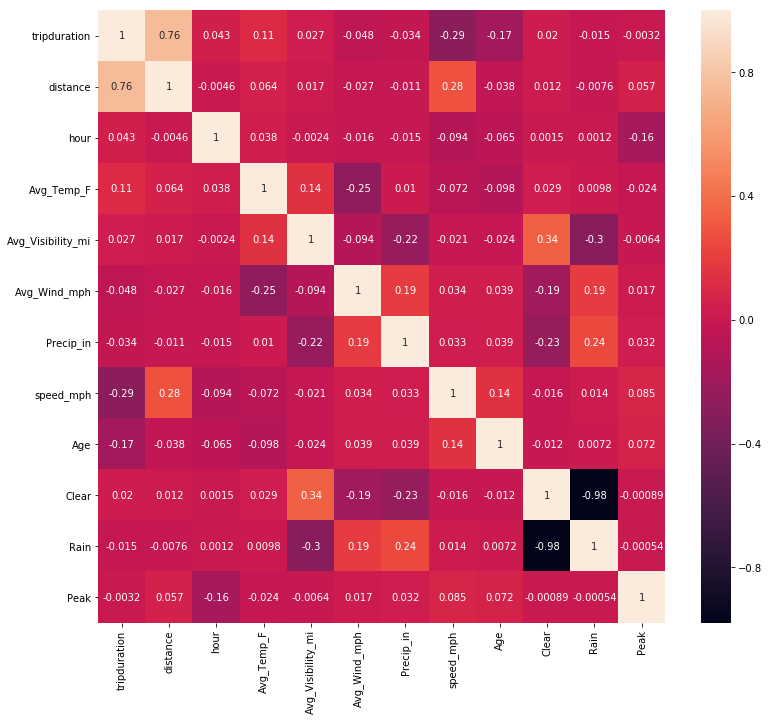

In [119]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 12.7,11.27
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,annot=True) #correlation heatmap

Distance and Speed seem to be correlated with the trip duration implying that they are important in determining the travel time 
Rain and Clear are neagtively correlated with each other- only one of these will be used in the models
The remaining correlation coefficients are not very high to cause multicollinearity.

# Model 1: Linear Regression-original variables without speed

This is the first model which predicts tripduration based on variables like distance, age, gender and some
temperature variables. Speed is not used for predictions in this model.

In [120]:
#import packages needed for linear regression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,r2_score
from sklearn import preprocessing

In [121]:
#create predictor and independent variables dataframes
X1=all_months3.drop(['start_station_name','tripduration','end_station_name','gender2','hour',\
                     'speed_mph','Rain','Hour_Bins'],axis=1)
Y1=all_months3[['tripduration']]

In [122]:
#split data into train and test sets
from sklearn import model_selection
X1_train,X1_test,y1_train,y1_test=model_selection.train_test_split(X1,Y1,test_size=0.3,random_state=1)

In [123]:
#scale the data
X1_train_scaled=preprocessing.scale(X1_train)
X1_test_scaled=preprocessing.scale(X1_test)
y1_train_scaled=preprocessing.scale(y1_train)
y1_test_scaled=preprocessing.scale(y1_test)

In [124]:
#build linear model on train scaled data
from sklearn.linear_model import LinearRegression

In [125]:
#create linear regression object
lm1=LinearRegression()

In [126]:
#fit linear model
lm1.fit(X1_train_scaled,y1_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [127]:
#get coefficients
lm1.coef_

array([[ 7.47356003e-01,  3.94160856e-02,  8.27423199e-05,
        -5.47577965e-03, -1.30403317e-02,  2.79819961e-02,
         2.51166869e-03, -3.12284544e-02, -2.89945274e-01,
        -3.93351609e-01]])

In [129]:
#store coefficients in data frame with the variable names
coef1=(pd.DataFrame(lm1.coef_)).T
coef1.index=X1.columns
coef1.columns=['Coefficients']
coef1

,Coefficients
distance,0.747356
Avg_Temp_F,0.039416
Avg_Visibility_mi,0.000083
Avg_Wind_mph,-0.005476
Precip_in,-0.013040
Age,0.027982
Clear,0.002512
Peak,-0.031228
F,-0.289945
M,-0.393352


In [130]:
#predict using the model
pred_train=lm1.predict(X1_train_scaled) #predict using train set
pred_test=lm1.predict(X1_test_scaled) #predict using test set

In [132]:
#check r2 score for train set
r2_score1=r2_score(y1_train_scaled, pred_train)
r2_score1

0.6310518531358323

In [133]:
#check mean squared error for train
mse_train1=mean_squared_error(y1_train_scaled, pred_train)
print(mse_train1)


0.36894814686416805


In [134]:
#check mean squared error for test
mse_test1=np.mean((pred_test-y1_test_scaled)**2)
print(mse_test1)

0.36930617342334593


This model has a very low R square indicating a bad fit

# Model 2: Linear Regression-transformed distance and trip duration, no speed

In this model, I have transformed the variables distance and tripduration to reduce their skewness.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1dbd950358>,
      dtype=object)

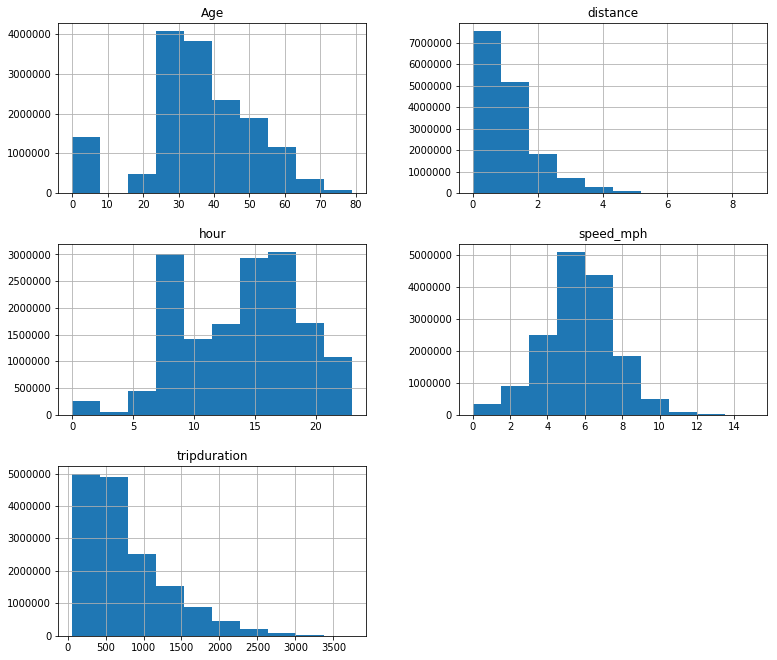

In [135]:
#plot histograms of the variables age, distance, hour, speed and tripduration
all_months3[['tripduration','distance','hour','speed_mph','Age']].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1d8f529358>,
      dtype=object)

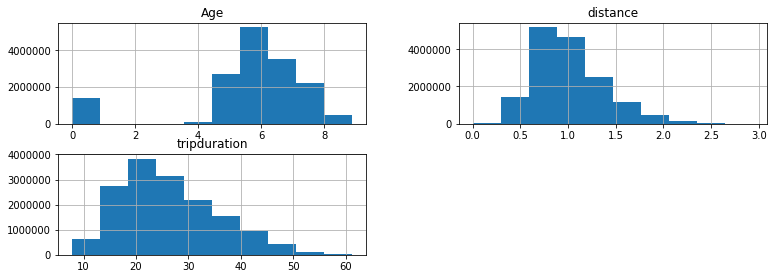

In [136]:
#transform variables
age_trans=all_months3['Age'] #store age in a new dataframe
age_trans=np.sqrt(age_trans)#sqrt transform age

dist_trans=all_months3['distance']#store distance in a new dataframe
dist_trans=np.sqrt(dist_trans)#sqrt transform distance

speed_trans=all_months3['speed_mph']#store speed in a new dataframe
speed_trans=np.sqrt(speed_trans)#sqrt transform speed

tripduration_trans=all_months3['tripduration']#store tripduration in a new dataframe
tripduration_trans=np.sqrt(tripduration_trans)#sqrt transform tripduration

trans_df=pd.concat([age_trans,dist_trans,tripduration_trans],axis=1)#concatenate all transformed variables

rcParams['figure.figsize'] = 12.7,4.27
trans_df.hist() #plot transformed variables

Correlation of the transformed variables

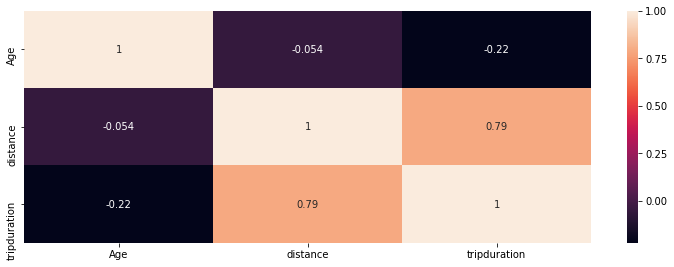

In [137]:
corr_mat_trans=trans_df.corr() #calculate correlation coefficients
rcParams['figure.figsize'] = 12.7,4.27
sns.heatmap(corr_mat_trans,xticklabels=corr_mat_trans.columns,yticklabels=corr_mat_trans,annot=True)\
#plot the corrleation heatmap

In [138]:
#concatenate the transformed variables with the other variables
transdf2=pd.concat([trans_df,all_months3[['Avg_Temp_F','Avg_Visibility_mi','Avg_Wind_mph','speed_mph',\
                                          'Clear','Peak','F','M']]],axis=1)

In [139]:
#check first few rows
transdf2.head()

,Age,distance,tripduration,Avg_Temp_F,Avg_Visibility_mi,Avg_Wind_mph,speed_mph,Clear,Peak,F,M
0,7.280110,0.737012,26.076810,48.0,9.22,8.0,2.875694,1,0,1,0
1,5.567764,1.158601,35.805028,48.0,9.22,8.0,3.769489,1,0,1,0
2,0.000000,0.759306,25.455844,48.0,9.22,8.0,3.203029,1,0,0,0
3,0.000000,0.759306,25.119713,48.0,9.22,8.0,3.289323,1,0,0,0
4,0.000000,0.759306,24.919872,48.0,9.22,8.0,3.342292,1,0,0,0


In [140]:
#create predictor and independent variables dataframes
X_trans=transdf2.drop(['tripduration','speed_mph'],axis=1)
Y_trans=transdf2[['tripduration']]

In [141]:
#split the data into train and test samples
from sklearn import model_selection
X3_train, X3_test, y3_train, y3_test = model_selection.train_test_split(X_trans, Y_trans, test_size=0.3,\
                                                                        random_state=1)

In [142]:
#scale the data
X3_train_scaled=preprocessing.scale(X3_train)
X3_test_scaled=preprocessing.scale(X3_test)
y3_train_scaled=preprocessing.scale(y3_train)
y3_test_scaled=preprocessing.scale(y3_test)

In [143]:
#build linear model on scaled train data
from sklearn.linear_model import LinearRegression

In [144]:
#create linear regression object
lm3=LinearRegression()

In [145]:
#fit linear model
lm3.fit(X3_train_scaled, y3_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [146]:
lm3.coef_
#store coefficients in data frame with the variable names
coef3=(pd.DataFrame(lm3.coef_)).T
coef3.index=X_trans.columns
coef3.columns=['Coefficients']
coef3

,Coefficients
Age,0.030428
distance,0.781390
Avg_Temp_F,0.037711
Avg_Visibility_mi,0.002595
Avg_Wind_mph,-0.007298
Clear,0.004539
Peak,-0.030654
F,-0.282289
M,-0.387256


In [147]:
#predict using the model
pred_train=lm3.predict(X3_train_scaled)#predict using train set
pred_test=lm3.predict(X3_test_scaled)#predict using test set

In [148]:
#check r2 score for train set
r2_score2=r2_score(y3_train_scaled, pred_train)
r2_score2

0.681614144684444

In [149]:
#check mean squared error for train
mse_train2=mean_squared_error(y3_train_scaled, pred_train)
print(mse_train2)

0.31838585531555635


In [150]:
#check mean squared error for test
mse_test2=np.mean((pred_test-y3_test_scaled)**2)
print(mse_test2)

0.3187690796284327


The R squared value has increased after transforming the variables but it is still not a great fit.

# Model 3: Linear Regression using actual speed and other transformed variables

This model predicts trip duration using transformed variables and actual speed

In [151]:
#create predictor and independent variables dataframes
X2_trans=transdf2.drop(['tripduration'],axis=1)
Y2_trans=transdf2[['tripduration']]

In [152]:
#split the data into train and test samples
from sklearn import model_selection
X4_train, X4_test, y4_train, y4_test = model_selection.train_test_split(X2_trans, Y2_trans, test_size=0.3,\
                                                                        random_state=1)

In [153]:
#scale the data
X4_train_scaled=preprocessing.scale(X4_train)
X4_test_scaled=preprocessing.scale(X4_test)
y4_train_scaled=preprocessing.scale(y4_train)
y4_test_scaled=preprocessing.scale(y4_test)

In [154]:
#create linear regression object
lm4=LinearRegression()

In [155]:
#fit linear model
lm4.fit(X4_train_scaled, y4_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [156]:
lm4.coef_
#store coefficients in data frame with the variable names
coef4=(pd.DataFrame(lm4.coef_)).T
coef4.index=X2_trans.columns
coef4.columns=['Coefficients']
coef4

,Coefficients
Age,-0.031039
distance,0.949880
Avg_Temp_F,0.004402
Avg_Visibility_mi,-0.000959
Avg_Wind_mph,-0.001050
speed_mph,-0.550903
Clear,-0.000178
Peak,-0.004109
F,-0.041110
M,-0.030732


In [157]:
#predict using the model
pred_train=lm4.predict(X4_train_scaled)#predict using train set
pred_test=lm4.predict(X4_test_scaled)#predict using test set

In [158]:
#check r2 score for train set
r2_score3=r2_score(y4_train_scaled, pred_train)
r2_score3

0.9256800428652832

In [159]:
#check mean squared error for train
mse_train2=mean_squared_error(y3_train_scaled, pred_train)
print(mse_train2)

0.07431995713471694


In [160]:
#check mean squared error for test
mse_test2=np.mean((pred_test-y3_test_scaled)**2)
print(mse_test2)

0.07448499968102615


This model, using the actual speed, has a very high R square and low mean sqaured errors. The fit seems to be good but this model has overfit the data by using actual speeds. Users might not have the same speed used by this model, slight
variations in the speed can reduce the accuracy of presdictions. Hence, this model is not useful

# Model 4: Linear Regression on the data cleaned up further

In this model, I have claned up the data further. I have cleaned up the tripduration, distance and speed data further to remove outliers/ anomalies in the data. Some values of speed are very low because the trip duration for very short distance is too high. this could be becasue the users took many breaks or that the data was not captured correctly. Such values should be removed to improve predictions.


In [161]:
#create a copy of the main dataframe-all_months3
all_months_tp=all_months3

In [162]:
#get the data summary
all_months_tp.describe()

,tripduration,distance,hour,Avg_Temp_F,Avg_Visibility_mi,Avg_Wind_mph,Precip_in,speed_mph,Age,Clear,Rain,Peak,F,M
count,1.562791e+07,1.562791e+07,1.562791e+07,1.562791e+07,1.562791e+07,1.562791e+07,1.562791e+07,1.562791e+07,1.562791e+07,1.562791e+07,1.562791e+07,1.562791e+07,1.562791e+07,1.562791e+07
mean,7.761461e+02,1.144923e+00,1.390272e+01,6.239812e+01,9.737690e+00,6.690307e+00,2.630545e+01,5.690990e+00,3.552081e+01,6.867586e-01,3.039369e-01,5.404457e-01,2.287824e-01,6.764427e-01
std,5.499929e+02,8.567060e-01,4.852555e+00,1.625386e+01,6.975517e-01,2.587649e+00,2.506376e+01,1.867915e+00,1.583361e+01,4.638117e-01,4.599557e-01,4.983615e-01,4.200488e-01,4.678333e-01
min,6.100000e+01,0.000000e+00,0.000000e+00,-1.800000e+01,5.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.700000e+02,5.514460e-01,1.000000e+01,5.200000e+01,1.000000e+01,5.000000e+00,1.000000e+01,4.563618e+00,2.800000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.110000e+02,8.923150e-01,1.500000e+01,6.600000e+01,1.000000e+01,6.000000e+00,2.000000e+01,5.723158e+00,3.500000e+01,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00
75%,1.042000e+03,1.472555e+00,1.800000e+01,7.500000e+01,1.000000e+01,8.000000e+00,4.000000e+01,6.884229e+00,4.600000e+01,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00
max,3.749000e+03,8.631839e+00,2.300000e+01,8.700000e+01,1.000000e+01,2.200000e+01,2.100100e+02,1.499790e+01,7.900000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


I have already removed very high values for tripduration. Analyzing the other extreme(low values) to clean it further.

In [163]:
#check percentiles for trip duration
all_months_tp['tripduration'].quantile(0.01)

114.0

In [164]:
#number of rows with < 1st percentile value of tripduration
len(all_months_tp[all_months_tp['tripduration']<=114])

156799

In [165]:
#remove rows with speed <114-1st percentile. These values can be ignored as the number of rows with these values is not
#very high. Besdies, this value is less than 2 minutes. It might take upto a minute for a person to remove the bike 
#from the stand so the actual tripduration here might be less than a minute.
all_months_tp1=all_months_tp[all_months_tp['tripduration']>114]

In [166]:
#check 1st percentile after eliminating very small values of tripduration
all_months_tp1['tripduration'].quantile(0.01)

138.0

In [167]:
#check if the data has 0 values of speed 
len(all_months_tp1[all_months_tp1['speed_mph']==0])

1

In [168]:
##delete all rows where start station and end station are the same
all_months_tp1=all_months_tp1[all_months_tp1['start_station_name']!=all_months_tp1['end_station_name']]

In [169]:
#check minimum distance
all_months_tp1['distance'].describe()

count    1.372932e+07
mean     1.148734e+00
std      8.506772e-01
min      0.000000e+00
25%      5.585434e-01
50%      8.953284e-01
75%      1.472112e+00
max      8.631839e+00
Name: distance, dtype: float64

In [170]:
#check row with distance=0
all_months_tp1[all_months_tp1['distance']==0]

,start_station_name,end_station_name,tripduration,gender2,distance,hour,Avg_Temp_F,Avg_Visibility_mi,Avg_Wind_mph,Precip_in,speed_mph,Age,Clear,Rain,Hour_Bins,Peak,F,M
1086904,Penn Station Valet,Penn Station Valet - Valet Scan,330,M,0.0,15,37.0,10.0,6.0,10.0,0.0,29,1,0,Peak,1,0,1


In [171]:
#eliminate row with 0 distance
all_months_tp1=all_months_tp1[all_months_tp1['distance']>0]

In [172]:
#check minimum distance
all_months_tp1['distance'].describe()

count    1.372932e+07
mean     1.148734e+00
std      8.506771e-01
min      4.395723e-03
25%      5.585434e-01
50%      8.953284e-01
75%      1.472112e+00
max      8.631839e+00
Name: distance, dtype: float64

In [173]:
#average walking speed is ~3mph, so the cycling speed should be >3mph as it is difficult to push the pedals to maintain/
#match the walking speed. Asumming this, I am going to eliminate rows where speed is <3 mph. In most such rows, the
#trip duration seems very high for a very short trip. This could indicate that the user was taking breaks or that the 
#tripduration is not captured correctly. Either ways, it is not useful to retain such values for modeling.

#check number of rows with speed <3mph
all_months_tp1[all_months_tp1['speed_mph']<3]

,start_station_name,end_station_name,tripduration,gender2,distance,hour,Avg_Temp_F,Avg_Visibility_mi,Avg_Wind_mph,Precip_in,speed_mph,Age,Clear,Rain,Hour_Bins,Peak,F,M
0,W 82 St & Central Park West,Central Park West & W 72 St,680,F,0.543187,0,48.0,9.22,8.0,0.0,2.875694,53,1,0,Regular,0,1,0
8,Central Park West & W 72 St,Columbus Ave & W 72 St,634,M,0.169616,0,48.0,9.22,8.0,0.0,0.963119,38,1,0,Regular,0,0,1
9,2 Ave & E 31 St,E 33 St & 5 Ave,1081,M,0.525803,0,48.0,9.22,8.0,0.0,1.751056,25,1,0,Regular,0,0,1
14,W 74 St & Columbus Ave,Central Park West & W 68 St,1246,M,0.356856,0,48.0,9.22,8.0,0.0,1.031045,41,1,0,Regular,0,0,1
25,W 52 St & 9 Ave,W 38 St & 8 Ave,1580,U,0.711493,0,48.0,9.22,8.0,0.0,1.621124,0,1,0,Regular,0,0,0
26,W 52 St & 9 Ave,W 38 St & 8 Ave,1565,U,0.711493,0,48.0,9.22,8.0,0.0,1.636661,0,1,0,Regular,0,0,0
42,W 27 St & 7 Ave,E 17 St & Broadway,919,U,0.692671,0,48.0,9.22,8.0,0.0,2.713399,0,1,0,Regular,0,0,0
45,W 27 St & 7 Ave,E 17 St & Broadway,902,U,0.692671,0,48.0,9.22,8.0,0.0,2.764539,0,1,0,Regular,0,0,0
46,E 16 St & Irving Pl,E 11 St & 2 Ave,401,U,0.332648,0,48.0,9.22,8.0,0.0,2.986362,0,1,0,Regular,0,0,0
50,E 85 St & 3 Ave,E 75 St & 3 Ave,718,M,0.512529,0,48.0,9.22,8.0,0.0,2.569783,55,1,0,Regular,0,0,1


In [174]:
#create a new daatframe with speed>=3mph
all_months_tp3=all_months_tp1[all_months_tp1['speed_mph']>=3]

In [175]:
all_months_tp3['speed_mph'].describe()

count    1.266761e+07
mean     6.004898e+00
std      1.557548e+00
min      3.000001e+00
25%      4.877350e+00
50%      5.888536e+00
75%      6.988318e+00
max      1.499190e+01
Name: speed_mph, dtype: float64

In [176]:
all_months_tp3['distance'].describe()

count    1.266761e+07
mean     1.187825e+00
std      8.658690e-01
min      9.627198e-02
25%      5.801608e-01
50%      9.269450e-01
75%      1.525394e+00
max      8.631839e+00
Name: distance, dtype: float64

In [177]:
all_months_tp3.describe()

,tripduration,distance,hour,Avg_Temp_F,Avg_Visibility_mi,Avg_Wind_mph,Precip_in,speed_mph,Age,Clear,Rain,Peak,F,M
count,1.266761e+07,1.266761e+07,1.266761e+07,1.266761e+07,1.266761e+07,1.266761e+07,1.266761e+07,1.266761e+07,1.266761e+07,1.266761e+07,1.266761e+07,1.266761e+07,1.266761e+07,1.266761e+07
mean,7.294930e+02,1.187825e+00,1.383219e+01,6.041013e+01,9.727075e+00,6.827641e+00,2.652177e+01,6.004898e+00,3.652799e+01,6.952011e-01,2.939448e-01,5.517236e-01,2.322007e-01,6.980209e-01
std,5.028542e+02,8.658690e-01,4.888453e+00,1.655264e+01,7.318789e-01,2.649294e+00,2.492703e+01,1.557548e+00,1.487170e+01,4.603222e-01,4.555670e-01,4.973175e-01,4.222364e-01,4.591162e-01
min,1.150000e+02,9.627198e-02,0.000000e+00,-1.800000e+01,5.000000e+00,1.000000e+00,0.000000e+00,3.000001e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.600000e+02,5.801608e-01,9.000000e+00,5.000000e+01,1.000000e+01,5.000000e+00,1.000000e+01,4.877350e+00,2.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.790000e+02,9.269450e-01,1.500000e+01,6.400000e+01,1.000000e+01,6.000000e+00,2.000000e+01,5.888536e+00,3.500000e+01,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00
75%,9.610000e+02,1.525394e+00,1.800000e+01,7.200000e+01,1.000000e+01,8.000000e+00,4.000000e+01,6.988318e+00,4.600000e+01,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00
max,3.749000e+03,8.631839e+00,2.300000e+01,8.700000e+01,1.000000e+01,2.200000e+01,2.100100e+02,1.499190e+01,7.900000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [178]:
#check first few rows
all_months_tp3.head()

,start_station_name,end_station_name,tripduration,gender2,distance,hour,Avg_Temp_F,Avg_Visibility_mi,Avg_Wind_mph,Precip_in,speed_mph,Age,Clear,Rain,Hour_Bins,Peak,F,M
1,Cooper Square & E 7 St,Broadway & W 32 St,1282,F,1.342357,0,48.0,9.22,8.0,0.0,3.769489,31,1,0,Regular,0,1,0
2,5 Ave & E 78 St,3 Ave & E 71 St,648,U,0.576545,0,48.0,9.22,8.0,0.0,3.203029,0,1,0,Regular,0,0,0
3,5 Ave & E 78 St,3 Ave & E 71 St,631,U,0.576545,0,48.0,9.22,8.0,0.0,3.289323,0,1,0,Regular,0,0,0
4,5 Ave & E 78 St,3 Ave & E 71 St,621,U,0.576545,0,48.0,9.22,8.0,0.0,3.342292,0,1,0,Regular,0,0,0
5,Broadway & W 60 St,9 Ave & W 45 St,559,M,0.788846,0,48.0,9.22,8.0,0.0,5.080225,45,1,0,Regular,0,0,1


In [179]:
#create predictor and independent variables dataframes
X_new=all_months_tp3.drop(['tripduration','start_station_name','end_station_name','gender2','hour','speed_mph',\
                       'Rain','Hour_Bins'],axis=1)
Y_new=all_months_tp3[['tripduration']]

In [180]:
#split data into train and test
from sklearn import model_selection
X1_train,X1_test,y1_train,y1_test=model_selection.train_test_split(X_new,Y_new,test_size=0.3,random_state=1)

In [181]:
#scale data
X1_train_scaled=preprocessing.scale(X1_train)
X1_test_scaled=preprocessing.scale(X1_test)
y1_train_scaled=preprocessing.scale(y1_train)
y1_test_scaled=preprocessing.scale(y1_test)

In [182]:
#create linear regression object
lm1=LinearRegression()

In [183]:
#fit linear model
lm1.fit(X1_train_scaled,y1_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [184]:
lm1.coef_
#store coefficients in data frame with the variable names
coef1=(pd.DataFrame(lm1.coef_)).T
coef1.index=X_new.columns
coef1.columns=['Coefficients']
coef1

,Coefficients
distance,0.881581
Avg_Temp_F,0.020699
Avg_Visibility_mi,-0.000311
Avg_Wind_mph,-0.003384
Precip_in,-0.007467
Age,0.026928
Clear,0.002922
Peak,-0.017512
F,-0.164830
M,-0.247624


In [186]:
#predict using the model
pred_train=lm1.predict(X1_train_scaled)#predict using train set
pred_test=lm1.predict(X1_test_scaled)#predict using test set

In [187]:
#check r2 score for train set
r2_score4=r2_score(y1_train_scaled, pred_train)
r2_score4

0.8152222373435793

This model has a good fit even without speed as a predictor. So, the assumption that speeds lower than 3mph could be incorrectly captured/ user too many breaks is correct.

# Model 5a: Linear Regression using cleaned data of model 4 and average speed per route per gender

Since speed is an important predictor for travel time, it is important to use speed in the model. Using the actual speed can overfit the model, as seen in the model 3. Most navigation systems use speed limits to predict travel time.
Hence, some form/ knowledge of speed is used by navigation systems to predict the travel time. In the following model, I am going to use the average speed on each route for each gender.

In [188]:
#subset of the dataframe used in the previous model
all_months_tp4=all_months_tp3[['start_station_name','end_station_name','gender2','speed_mph']]

In [189]:
all_months_tp4.groupby('gender2').mean()

,speed_mph
gender2,
F,5.648033
M,6.219967
U,5.041007


There is variation in the average speeds by gender. This means that gender wise speeds could be useful information for the model. Next, I am going to calculate the gender wise average speeds per route.

In [190]:
#calculate mean speed on each route by gender
all_months_tp5=all_months_tp4.groupby(['start_station_name','end_station_name','gender2']).mean() #groupby start,
#stop station and gender

all_months_tp5.reset_index(inplace=True)#reset index to use the dataframe for joining

all_months_tp5.columns=['start_station_name','end_station_name','gender2','avg_speed'] #rename columns for readability

all_months_tp5.head(10) #check first 10 rows

,start_station_name,end_station_name,gender2,avg_speed
0,1 Ave & E 110 St,1 Ave & E 68 St,F,4.335289
1,1 Ave & E 110 St,1 Ave & E 68 St,M,9.313449
2,1 Ave & E 110 St,1 Ave & E 68 St,U,5.293429
3,1 Ave & E 110 St,1 Ave & E 78 St,F,6.390858
4,1 Ave & E 110 St,1 Ave & E 78 St,M,8.348819
5,1 Ave & E 110 St,1 Ave & E 78 St,U,3.740518
6,1 Ave & E 110 St,1 Ave & E 94 St,F,5.736573
7,1 Ave & E 110 St,1 Ave & E 94 St,M,6.864711
8,1 Ave & E 110 St,11 Ave & W 27 St,U,7.296539
9,1 Ave & E 110 St,11 Ave & W 59 St,F,5.110703


From this table, it is clear that there is a difference in the gender-wise average speeds across routes. This information is useful for the model. 

In [191]:
#dataframe subset with limited columns from all_months_tp3 (speed <=3mph)- to reduce merging time
all_months_tp3_new=all_months_tp3[['start_station_name','end_station_name','gender2']]

In [192]:
#merge the avg speed to the rows of all_months_tp3 using the abov dataframe
#this line of code finds the exact row match for start station,end station and gender in the "all_months_tp3_new"
#and bind the "avg_speed" to it

#This way, I have a dataframe with average speeds based on the street and the user type(gender)
all_months_tp3_new_speed=pd.merge(left=all_months_tp3_new,right=all_months_tp5, left_on=['start_station_name',\
'end_station_name','gender2'],right_on=['start_station_name','end_station_name','gender2'],how='left')

In [193]:
#reset index and concatenate because indices are different and NANs get introduced if not reset

#copy the original dataframe into a new dataframe to revert changes easily if needed
all_months_tp6=all_months_tp3 

#reset indices to enable concatenation of the average speed to the original dataframe
all_months_tp7=all_months_tp6.reset_index() 

#rest_index resets the index and creates a column for the orginal index. delete that column
all_months_tp7.drop('index',axis=1,inplace=True) 

#read the head of the data after resetting the index
all_months_tp7.head() 

,start_station_name,end_station_name,tripduration,gender2,distance,hour,Avg_Temp_F,Avg_Visibility_mi,Avg_Wind_mph,Precip_in,speed_mph,Age,Clear,Rain,Hour_Bins,Peak,F,M
0,Cooper Square & E 7 St,Broadway & W 32 St,1282,F,1.342357,0,48.0,9.22,8.0,0.0,3.769489,31,1,0,Regular,0,1,0
1,5 Ave & E 78 St,3 Ave & E 71 St,648,U,0.576545,0,48.0,9.22,8.0,0.0,3.203029,0,1,0,Regular,0,0,0
2,5 Ave & E 78 St,3 Ave & E 71 St,631,U,0.576545,0,48.0,9.22,8.0,0.0,3.289323,0,1,0,Regular,0,0,0
3,5 Ave & E 78 St,3 Ave & E 71 St,621,U,0.576545,0,48.0,9.22,8.0,0.0,3.342292,0,1,0,Regular,0,0,0
4,Broadway & W 60 St,9 Ave & W 45 St,559,M,0.788846,0,48.0,9.22,8.0,0.0,5.080225,45,1,0,Regular,0,0,1


In [194]:
#concatenate the original dataframe with the average speed per street per gender
all_months_tp3_avg_speed1=pd.concat([all_months_tp7,all_months_tp3_new_speed['avg_speed']],axis=1)

In [195]:
#summary of the new dataframe with the average speed per street per user
all_months_tp3_avg_speed1.describe()

,tripduration,distance,hour,Avg_Temp_F,Avg_Visibility_mi,Avg_Wind_mph,Precip_in,speed_mph,Age,Clear,Rain,Peak,F,M,avg_speed
count,1.266761e+07,1.266761e+07,1.266761e+07,1.266761e+07,1.266761e+07,1.266761e+07,1.266761e+07,1.266761e+07,1.266761e+07,1.266761e+07,1.266761e+07,1.266761e+07,1.266761e+07,1.266761e+07,1.266761e+07
mean,7.294930e+02,1.187825e+00,1.383219e+01,6.041013e+01,9.727075e+00,6.827641e+00,2.652177e+01,6.004898e+00,3.652799e+01,6.952011e-01,2.939448e-01,5.517236e-01,2.322007e-01,6.980209e-01,6.004898e+00
std,5.028542e+02,8.658690e-01,4.888453e+00,1.655264e+01,7.318789e-01,2.649294e+00,2.492703e+01,1.557548e+00,1.487170e+01,4.603222e-01,4.555670e-01,4.973175e-01,4.222364e-01,4.591162e-01,1.002383e+00
min,1.150000e+02,9.627198e-02,0.000000e+00,-1.800000e+01,5.000000e+00,1.000000e+00,0.000000e+00,3.000001e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000016e+00
25%,3.600000e+02,5.801608e-01,9.000000e+00,5.000000e+01,1.000000e+01,5.000000e+00,1.000000e+01,4.877350e+00,2.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.328342e+00
50%,5.790000e+02,9.269450e-01,1.500000e+01,6.400000e+01,1.000000e+01,6.000000e+00,2.000000e+01,5.888536e+00,3.500000e+01,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,5.917009e+00
75%,9.610000e+02,1.525394e+00,1.800000e+01,7.200000e+01,1.000000e+01,8.000000e+00,4.000000e+01,6.988318e+00,4.600000e+01,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,6.614924e+00
max,3.749000e+03,8.631839e+00,2.300000e+01,8.700000e+01,1.000000e+01,2.200000e+01,2.100100e+02,1.499190e+01,7.900000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.326769e+01


In [196]:
#check for nans
all_months_tp3_avg_speed1.isnull().sum()

start_station_name    0
end_station_name      0
tripduration          0
gender2               0
distance              0
hour                  0
Avg_Temp_F            0
Avg_Visibility_mi     0
Avg_Wind_mph          0
Precip_in             0
speed_mph             0
Age                   0
Clear                 0
Rain                  0
Hour_Bins             0
Peak                  0
F                     0
M                     0
avg_speed             0
dtype: int64

In [197]:
# Linear Model with avg speed per route per gender
#create predictor and independent variables dataframes
X_new=all_months_tp3_avg_speed1.drop(['tripduration','start_station_name','end_station_name','gender2',\
                                      'hour','speed_mph',\
                       'Rain','Hour_Bins'],axis=1)
Y_new=all_months_tp3_avg_speed1[['tripduration']]

In [198]:
#split data into train and test
from sklearn import model_selection
X1_train,X1_test,y1_train,y1_test=model_selection.train_test_split(X_new,Y_new,test_size=0.3,random_state=1)

In [199]:
#scale data
X1_train_scaled=preprocessing.scale(X1_train)
X1_test_scaled=preprocessing.scale(X1_test)
y1_train_scaled=preprocessing.scale(y1_train)
y1_test_scaled=preprocessing.scale(y1_test)

In [200]:
#create linear regression object
lm1=LinearRegression()

In [201]:
#fit linear model
lm1.fit(X1_train_scaled,y1_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [202]:
lm1.coef_
#store coefficients in data frame with the variable names
coef1=(pd.DataFrame(lm1.coef_)).T
coef1.index=X_new.columns
coef1.columns=['Coefficients']
coef1

,Coefficients
distance,0.986459
Avg_Temp_F,0.016508
Avg_Visibility_mi,-0.000554
Avg_Wind_mph,-0.002938
Precip_in,-0.005862
Age,0.020779
Clear,0.002677
Peak,-0.011818
F,-0.082080
M,-0.087925


In [203]:
#predict using the model
pred_train=lm1.predict(X1_train_scaled)#predict using train set
pred_test=lm1.predict(X1_test_scaled)#predict using test set

In [204]:
#check r2 score for train set
r2_score5=r2_score(y1_train_scaled, pred_train)
r2_score5

0.8610270276427597

This model has a better fit than the previous ones without speed.

# Model 5b: Refining model 5a to improve interpretability

Refining the model 5 ( above model) by dropping predictors that are not very intuitive. Age has many missing and incorrect values, hence it might not be useful for predictions.

In [205]:
#create predictor and independent variables dataframes
#speed>2 rscore =76
#speed>2.5 rscore =78
#speed>=3 rscore=81
#avg speed per route per gender score=86
X_new=all_months_tp3_avg_speed1.drop(['tripduration','start_station_name','end_station_name','gender2',\
                                      'hour','Avg_Wind_mph',\
                                    'Avg_Visibility_mi','Precip_in','speed_mph','Age','Clear','F',\
                       'Rain','Hour_Bins','Peak'],axis=1)
Y_new=all_months_tp3_avg_speed1[['tripduration']]

In [206]:
#split data into train and test
from sklearn import model_selection
X1_train,X1_test,y1_train,y1_test=model_selection.train_test_split(X_new,Y_new,test_size=0.3,random_state=1)

#scale data
X1_train_scaled=preprocessing.scale(X1_train)
X1_test_scaled=preprocessing.scale(X1_test)
y1_train_scaled=preprocessing.scale(y1_train)
y1_test_scaled=preprocessing.scale(y1_test)

#create linear regression object
lm1=LinearRegression()

#fit linear model
lm1.fit(X1_train_scaled,y1_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [207]:
lm1.coef_
#store coefficients in data frame with the variable names
coef1=(pd.DataFrame(lm1.coef_)).T
coef1.index=X_new.columns
coef1.columns=['Coefficients']
coef1

,Coefficients
distance,0.991329
Avg_Temp_F,0.017961
M,-0.010475
avg_speed,-0.263480


In [208]:
#predict using the model
pred_train=lm1.predict(X1_train_scaled)#predict using train set
pred_test=lm1.predict(X1_test_scaled)#predict using test set

In [209]:
#check r2 score for train set
r2_score5=r2_score(y1_train_scaled, pred_train)
r2_score5

0.8594634103936205

The R square is the same as the previous model 5a but this model has a better interpretability. As distance increase trip duration increases. As temperature increase, trip duration increases (could be because more people bike with better temperature). Males ride faster. Increase in speed reduces trip duration.

# Model 6: Linear Regression improvement over model 5b by using transformed variables

In this model, I am going to use tranformed variables to improve the fit of the model 5b.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1d97ccd278>,
      dtype=object)

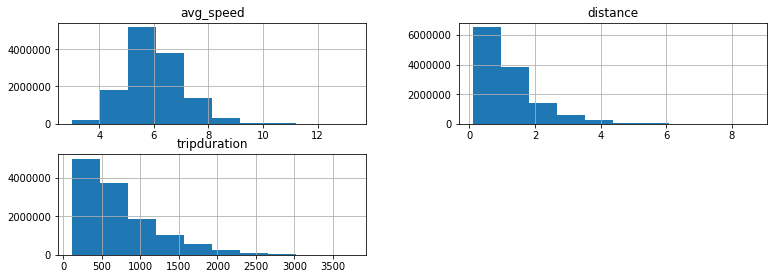

In [210]:
#plot histograms of tripduration, distance, avg_speed
rcParams['figure.figsize'] = 12.7,4.27
all_months_tp3_avg_speed1[['tripduration','distance','avg_speed']].hist()

In [211]:
#transform variables and bind to the data
#sqrt transform trip duration
trip_new1=pd.DataFrame(np.sqrt(all_months_tp3_avg_speed1['tripduration']))
trip_new1.columns=['trip_new1'] #rename column for differentiating from the original tripduration

#sqrt transform distance
dist_new1=pd.DataFrame(np.sqrt(all_months_tp3_avg_speed1['distance']))
dist_new1.columns=['dist_new1']#rename column for differentiating from the original tripduration

#concatenate with the rest of the data
all_months_tp3_avg_speed2=pd.concat([all_months_tp3_avg_speed1,dist_new1,trip_new1],axis=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1dad49a668>,
      dtype=object)

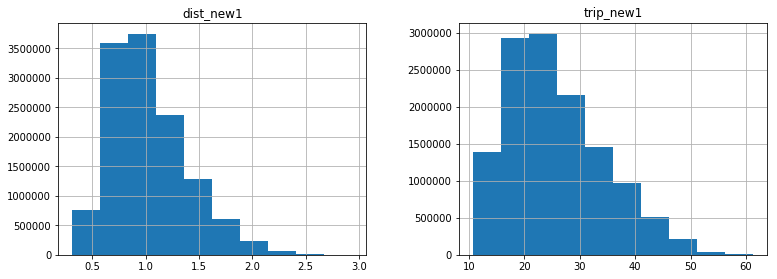

In [212]:
rcParams['figure.figsize'] = 12.7,4.27
all_months_tp3_avg_speed2[['dist_new1','trip_new1']].hist()#plot transformed variables

In [213]:
#check first few rows
all_months_tp3_avg_speed2.head()

,start_station_name,end_station_name,tripduration,gender2,distance,hour,Avg_Temp_F,Avg_Visibility_mi,Avg_Wind_mph,Precip_in,...,Age,Clear,Rain,Hour_Bins,Peak,F,M,avg_speed,dist_new1,trip_new1
0,Cooper Square & E 7 St,Broadway & W 32 St,1282,F,1.342357,0,48.0,9.22,8.0,0.0,...,31,1,0,Regular,0,1,0,5.187502,1.158601,35.805028
1,5 Ave & E 78 St,3 Ave & E 71 St,648,U,0.576545,0,48.0,9.22,8.0,0.0,...,0,1,0,Regular,0,0,0,3.591381,0.759306,25.455844
2,5 Ave & E 78 St,3 Ave & E 71 St,631,U,0.576545,0,48.0,9.22,8.0,0.0,...,0,1,0,Regular,0,0,0,3.591381,0.759306,25.119713
3,5 Ave & E 78 St,3 Ave & E 71 St,621,U,0.576545,0,48.0,9.22,8.0,0.0,...,0,1,0,Regular,0,0,0,3.591381,0.759306,24.919872
4,Broadway & W 60 St,9 Ave & W 45 St,559,M,0.788846,0,48.0,9.22,8.0,0.0,...,45,1,0,Regular,0,0,1,6.129269,0.888170,23.643181


In [214]:
#create predictor and independent variables dataframes
X_new=all_months_tp3_avg_speed2.drop(['tripduration','distance','trip_new1','start_station_name',\
                                      'end_station_name','gender2','hour','Avg_Wind_mph',\
                                    'Avg_Visibility_mi','Precip_in','speed_mph','Age','Clear','F',\
                       'Rain','Hour_Bins','Peak'],axis=1)
Y_new=all_months_tp3_avg_speed2[['trip_new1']]

In [215]:
#split data into train and test
from sklearn import model_selection
X1_train,X1_test,y1_train,y1_test=model_selection.train_test_split(X_new,Y_new,test_size=0.3,random_state=1)

In [216]:
#scale data
X1_train_scaled=preprocessing.scale(X1_train)
X1_test_scaled=preprocessing.scale(X1_test)
y1_train_scaled=preprocessing.scale(y1_train)
y1_test_scaled=preprocessing.scale(y1_test)

In [217]:
#create linear regression object
lm1=LinearRegression()

In [218]:
#fit linear model
lm1.fit(X1_train_scaled,y1_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [219]:
#store coefficients in data frame with the variable names
coef1=(pd.DataFrame(lm1.coef_)).T
coef1.index=X_new.columns
coef1.columns=['Coefficients']
coef1

,Coefficients
Avg_Temp_F,0.016301
M,-0.005932
avg_speed,-0.258895
dist_new1,1.010099


In [220]:
#predict using the model
pred_train=lm1.predict(X1_train_scaled)#predict using train set
pred_test=lm1.predict(X1_test_scaled)#predict using test set

In [221]:
#check r2 score for train set
r2_score6=r2_score(y1_train_scaled, pred_train)
r2_score6

0.8984965371934881

In [222]:
#check mean squared error for train 
mse_train1=mean_squared_error(y1_train_scaled, pred_train)
print(mse_train1)

0.10150346280651189


In [223]:
#check meas squared error for test
mse_test1=np.mean((pred_test-y1_test_scaled)**2)
print(mse_test1)

0.10140052913168078


This model has the best r squared value, hence the best fit-wise and interpretability-wise. Analyzing the residuals of this model now to confirm that the fit and the model accuracy are both good.

Text(0.5,0,'Residuals')

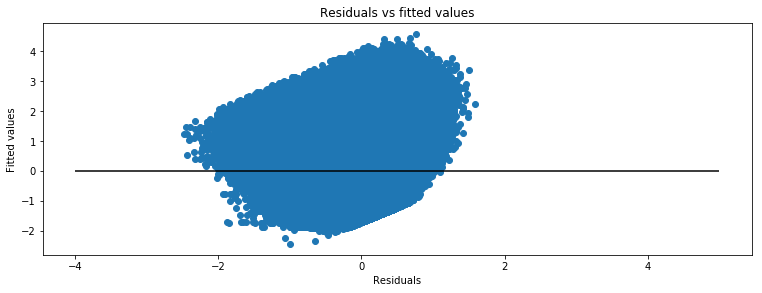

In [224]:
#plot residuals vs fitted values
rcParams['figure.figsize'] = 12.7,4.27
plt.scatter((pred_test-y1_test_scaled),pred_test)
plt.hlines(y=0,xmin=-4,xmax=5)
plt.title("Residuals vs fitted values")
plt.ylabel("Fitted values")
plt.xlabel("Residuals")

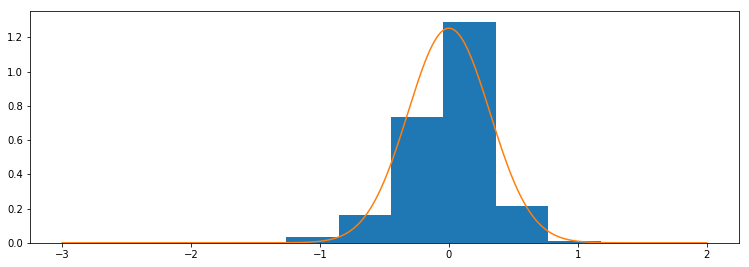

In [225]:
#residual plot
rcParams['figure.figsize'] = 12.7,4.27
r=(pred_test-y1_test_scaled)
#r.hist()
plt.hist(r, normed=True)
from scipy import stats 
# find minimum and maximum of xticks, so we know
# where we should compute theoretical distribution
xt = plt.xticks()[0]  
xmin, xmax = min(xt), max(xt)  
lnspc = np.linspace(xmin, xmax, len(r))

m, s = stats.norm.fit(r) # get mean and standard deviation  
pdf_g = stats.norm.pdf(lnspc, m, s) # now get theoretical values in our interval  
plt.plot(lnspc, pdf_g, label="Norm") # plot it

plt.show()

In [226]:
#mean of residuals 
mean_residuals=r.mean()
mean_residuals

1.114218186025231e-15

Text(0.5,0,'Actual values')

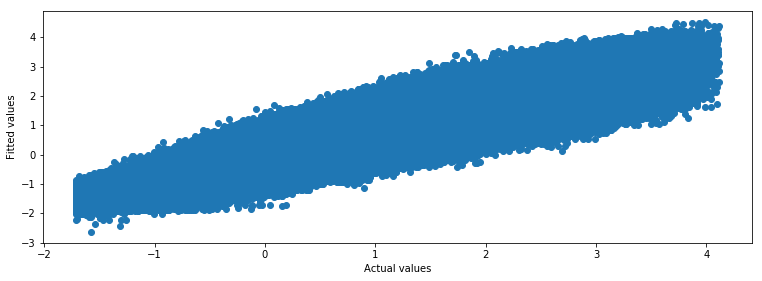

In [227]:
rcParams['figure.figsize'] = 12.7,4.27
fit_actual=pd.concat([pd.DataFrame(pred_train),pd.DataFrame(y1_train_scaled)],axis=1)
fit_actual.columns=['pred_train','y1_train_scaled']
plt.scatter(x='y1_train_scaled',y='pred_train',data=fit_actual)
plt.ylabel("Fitted values")
plt.xlabel("Actual values")

Based on the rsquared value, mean squared error, residual analysis, this model is the best. From this model, it can be inferred that unit increase in distance increases the trip duration by 1 unit, when all other factors are constant. Unit increase in temperature increases the trip duration by 0.0026 units. This could be beacuse many people bike when temperatures get better. Males have a 0.006 trip duration lesser than females and others. Finally, unit increase in speed reduces the trip duration by 0.0625 units.
Since, this model uses square roots of distance and trip duration, the coeeficients of male, temperature and speed should be squared for interpretation.
speed=(1*distance) + (0.003*temperature) - (0.0625*speed) - (0.0036*male)

In [ ]:
# Model 6 built using statsmodel library to check the confidence intervals of the coefficients

#import statsmodel
import statsmodels.api as sm

In [229]:
#create predictor and independent variables dataframes
X_new=all_months_tp3_avg_speed2.drop(['tripduration','distance','trip_new1','start_station_name',\
                                      'end_station_name','gender2','hour','Avg_Wind_mph',\
                                    'Avg_Visibility_mi','Precip_in','speed_mph','Age','Clear','F',\
                       'Rain','Hour_Bins','Peak'],axis=1)
Y_new=all_months_tp3_avg_speed2[['trip_new1']]

X_new=sm.add_constant(X_new) #add intercept

In [230]:
#scale data
X1_train_scaled=preprocessing.scale(X1_train)
X1_test_scaled=preprocessing.scale(X1_test)
y1_train_scaled=preprocessing.scale(y1_train)
y1_test_scaled=preprocessing.scale(y1_test)

In [231]:
#build linear model
model=sm.OLS(y1_train_scaled,X1_train_scaled).fit()

In [232]:
#summary of the model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                 1.962e+07
Date:                Mon, 30 Apr 2018   Prob (F-statistic):               0.00
Time:                        11:31:36   Log-Likelihood:            -2.4395e+06
No. Observations:             8867327   AIC:                         4.879e+06
Df Residuals:                 8867323   BIC:                         4.879e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0163      0.000    151.622      0.000       0.016       0.017
x2            -0.0059      0.000    -51.173      0.000      -0.006      -0.006
x3            -0.2589      0.000  -2079.976      0.000      -0.259      -0.259
x4             1.0101      0.000   8542.715      0.000       1.010       1.010
==============================================================================
Omnibus:                  1240756.501   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2528601.895
Skew:                           0.866   Prob(JB):                         0.00
Kurtosis:                       4.961   Cond. No.                         1.76
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The results of the linear model using statsmodel package is similar to the results obtained from the sklearn package.
Th confidence intervals of the coefficients are narrow, indicating a good fit and prediction accuracy.
Hence, it is possible to predict travel time for a user based on start and stop locations using distance, avergae speed in that route, temperature and gender.